In [ ]:
from scipy.io import netcdf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### ML to predict the future climate

#### **RF**

##### 4.5

In [ ]:
data=pd.read_csv('../content/drive/My Drive/Colab Notebooks/Drought/GilgelGibe/4.5Ensemble.csv')
data['Year']=pd.to_datetime(data.Year, format='%m/%d/%Y')
data.head()

,Year,station_id,cnrm_pr,miroc_pr,cccma_pr,mpi_pr,ensemble_pr,cnrm_tmax,miroc_tmax,cccma_tmax,mpi_tmax,ensemble_tmax,cnrm_tmin,miroc_tmin,cccma_tmin,mpi_tmin,ensemble_tmin
0,2010-01-01,0,0.84,6.25,0.00,0.0,1.7725,24.02,24.04,24.64,24.66,24.3400,10.09,13.21,12.07,12.15,11.8800
1,2010-01-02,0,0.84,6.15,5.22,0.0,3.0525,24.80,23.92,23.95,26.88,24.8875,10.58,13.10,13.25,12.00,12.2325
2,2010-01-03,0,0.84,0.00,4.81,0.0,1.4125,25.17,25.44,22.35,24.14,24.2750,10.67,11.81,10.99,11.75,11.3050
3,2010-01-04,0,0.84,0.00,0.00,0.0,0.2100,25.35,26.28,22.94,22.29,24.2150,11.06,11.81,10.59,11.60,11.2650
4,2010-01-05,0,0.84,0.00,0.00,0.0,0.2100,24.31,26.50,23.15,22.74,24.1750,11.81,10.52,12.02,11.17,11.3800


In [ ]:
data_train=data.loc[data.Year <= '2081-12-31']
data_test=data.loc[data.Year > '2081-12-31']

> <font color='orangered'>**Precipitation**

In [ ]:
X_train = data_train[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
y_train = data_train[['ensemble_pr']]

In [ ]:
X_test = data_test[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
y_test = data_test[['ensemble_pr']]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor()
rfmodel.fit(X_train, y_train)

<ipython-input-63-2d03af3fa59c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfmodel.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
# view the feature scores
train=data_train[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
feature_scores = pd.Series(rfmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

cnrm_pr     0.465666
cccma_pr    0.206558
mpi_pr      0.187562
miroc_pr    0.140213
dtype: float64

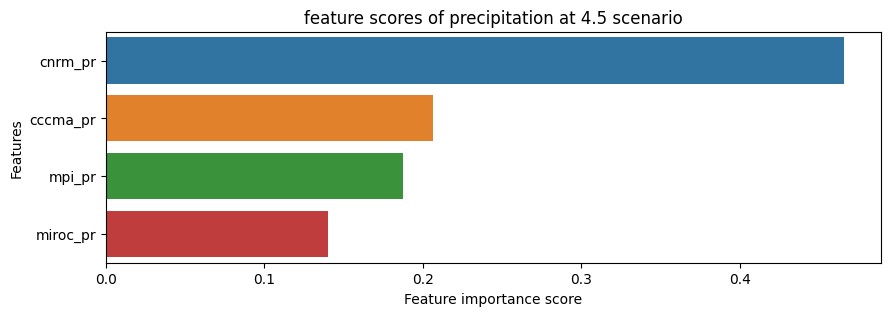

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of precipitation at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = rfmodel.predict(X_train)
Y_test_pred = rfmodel.predict(X_test)

In [ ]:
df_pred = pd.DataFrame(y_test, columns=['ensemble_pr'])
df_pred['predicted_pr']= Y_test_pred
df_pred['Date'] = pd.to_datetime(data_test.Year, format='%Y/%m/%d')
df_pred['station_id'] = data_test['station_id']
#df_pred = df_pred.reset_index()
df_pred=df_pred[['Date','station_id','ensemble_pr','predicted_pr']]
df_pred = df_pred.set_index('Date')
df_pred.head()

,station_id,ensemble_pr,predicted_pr
Date,,,
2082-01-01,0,0.210,0.21000
2082-01-02,0,0.210,0.21000
2082-01-03,0,1.535,1.53405
2082-01-04,0,1.680,1.67630
2082-01-05,0,0.210,0.21000


<Axes: xlabel='Date'>

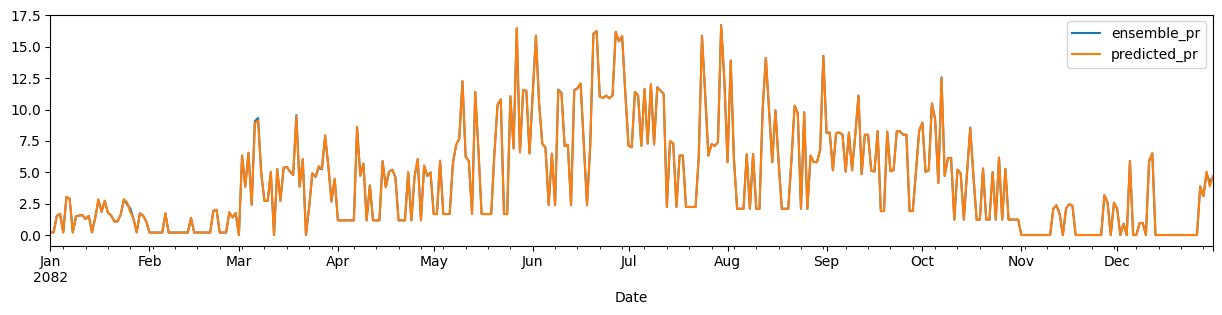

In [ ]:
df_pred[['ensemble_pr','predicted_pr']].loc[df_pred.station_id == 0][:365].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.011291216344692864
MSE is 0.003442737953086965
RMSE is 0.0586748494083024
R2 is 0.9997932949014665


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))

MSE train: 0.001, test: 0.003


> <font color='orangered'> **Temprature**

>> <font color='green'> **Tmax**

In [ ]:
X_train = data_train[['cnrm_tmax',	'miroc_tmax',	'cccma_tmax',	'mpi_tmax']]
y_train = data_train[['ensemble_tmax']]

In [ ]:
X_test = data_test[['cnrm_tmax',	'miroc_tmax',	'cccma_tmax',	'mpi_tmax']]
y_test = data_test[['ensemble_tmax']]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor()
rfmodel.fit(X_train, y_train)

<ipython-input-74-2d03af3fa59c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfmodel.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
# view the feature scores
train=data_train[['cnrm_tmax',	'miroc_tmax',	'cccma_tmax',	'mpi_tmax']]
feature_scores = pd.Series(rfmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

cnrm_tmax     0.610596
miroc_tmax    0.201984
mpi_tmax      0.128276
cccma_tmax    0.059145
dtype: float64

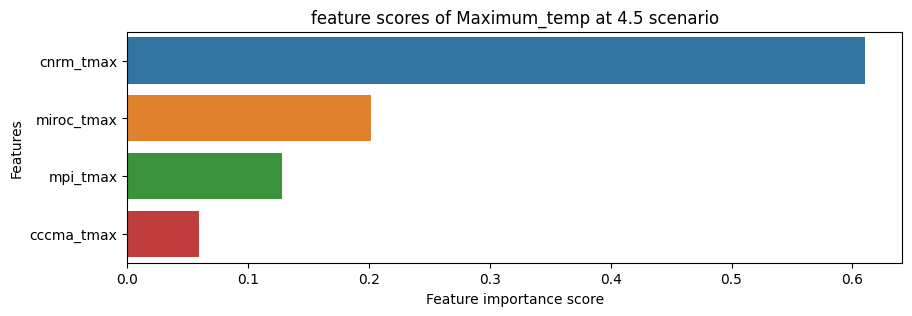

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of Maximum_temp at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = rfmodel.predict(X_train)
Y_test_pred = rfmodel.predict(X_test)

In [ ]:
df_pred = pd.DataFrame(y_test, columns=['ensemble_tmax'])
df_pred['predicted_tmax']= Y_test_pred
df_pred['Date'] = pd.to_datetime(data_test.Year, format='%Y/%m/%d')
df_pred['station_id'] = data_test['station_id']
#df_pred = df_pred.reset_index()
df_pred=df_pred[['Date','station_id','ensemble_tmax','predicted_tmax']]
df_pred = df_pred.set_index('Date')
df_pred.head()

,station_id,ensemble_tmax,predicted_tmax
Date,,,
2082-01-01,0,27.0600,27.104075
2082-01-02,0,27.7675,27.771025
2082-01-03,0,26.6100,26.588350
2082-01-04,0,26.0000,25.977475
2082-01-05,0,25.6100,25.561800


<Axes: xlabel='Date'>

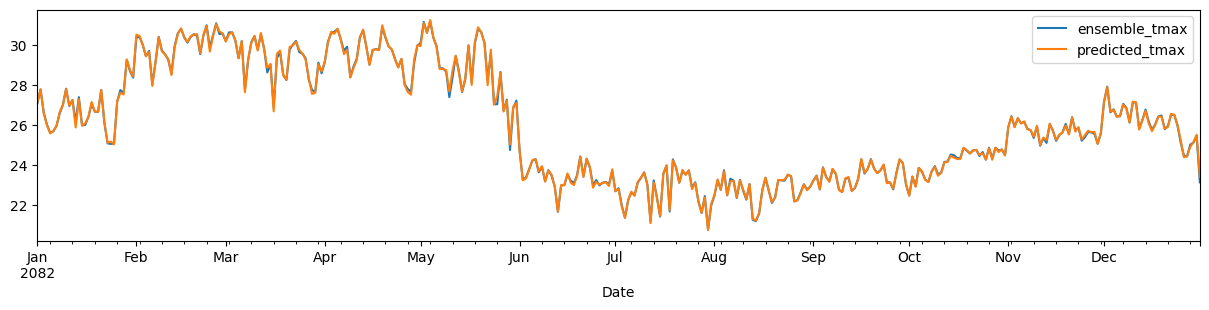

In [ ]:
df_pred[['ensemble_tmax','predicted_tmax']].loc[df_pred.station_id == 0][:365].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.0626299503726803
MSE is 0.013539058416085197
RMSE is 0.11635745964950076
R2 is 0.9985216310899626


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))

MSE train: 0.002, test: 0.014


>> <font color='green'>**Tmin**

In [ ]:
X_train = data_train[['cnrm_tmin',	'miroc_tmin',	'cccma_tmin',	'mpi_tmin']]
y_train = data_train[['ensemble_tmin']]

In [ ]:
X_test = data_test[['cnrm_tmin',	'miroc_tmin',	'cccma_tmin',	'mpi_tmin']]
y_test = data_test[['ensemble_tmin']]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor()
rfmodel.fit(X_train, y_train)

<ipython-input-84-2d03af3fa59c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfmodel.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
# view the feature scores
train=data_train[['cnrm_tmin',	'miroc_tmin',	'cccma_tmin',	'mpi_tmin']]
feature_scores = pd.Series(rfmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

cccma_tmin    0.637694
cnrm_tmin     0.138093
miroc_tmin    0.112130
mpi_tmin      0.112083
dtype: float64

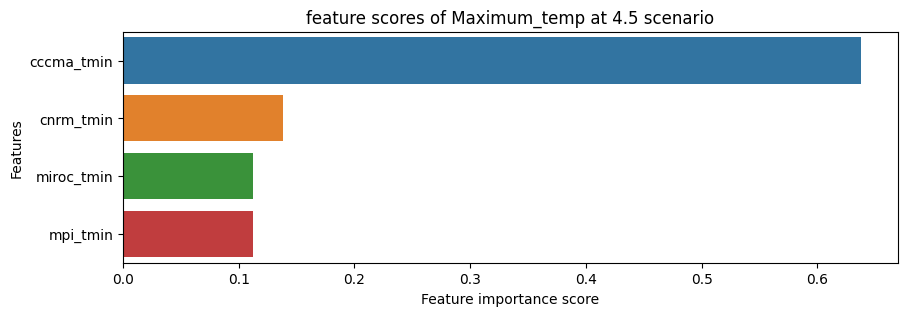

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of Maximum_temp at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = rfmodel.predict(X_train)
Y_test_pred = rfmodel.predict(X_test)

In [ ]:
df_pred = pd.DataFrame(y_test, columns=['ensemble_tmin'])
df_pred['predicted_tmin']= Y_test_pred
df_pred['Date'] = pd.to_datetime(data_test.Year, format='%Y/%m/%d')
df_pred['station_id'] = data_test['station_id']
#df_pred = df_pred.reset_index()
df_pred=df_pred[['Date','station_id','ensemble_tmin','predicted_tmin']]
df_pred = df_pred.set_index('Date')
df_pred.head()

,station_id,ensemble_tmin,predicted_tmin
Date,,,
2082-01-01,0,12.7000,12.735700
2082-01-02,0,13.2100,13.213425
2082-01-03,0,12.7575,12.729800
2082-01-04,0,12.9500,12.977225
2082-01-05,0,13.4600,13.452700


<Axes: xlabel='Date'>

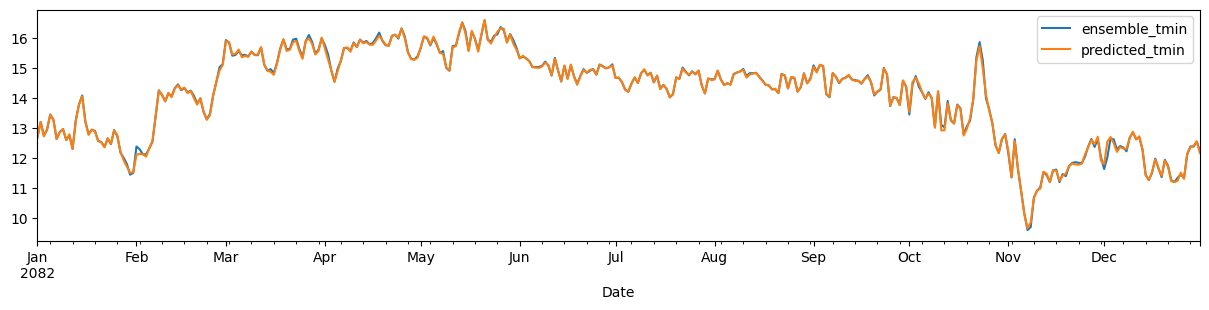

In [ ]:
df_pred[['ensemble_tmin','predicted_tmin']].loc[df_pred.station_id == 0][:365].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.02840568812747186
MSE is 0.0026915952383679996
RMSE is 0.051880586334080686
R2 is 0.9989933839827339


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))

MSE train: 0.000, test: 0.003


##### 8.5

In [ ]:
data=pd.read_csv('../content/drive/My Drive/Colab Notebooks/Drought/GilgelGibe/8.5Ensemble.csv')
data['Year']=pd.to_datetime(data.Year, format='%m/%d/%Y')
data.tail()

,Year,station_id,cnrm_pr,miroc_pr,cccma_pr,mpi_pr,ensemble_pr,cnrm_tmax,miroc_tmax,cccma_tmax,mpi_tmax,ensemble_tmax,cnrm_tmin,miroc_tmin,cccma_tmin,mpi_tmin,ensemble_tmin
131483,2099-12-27,3,0.0,0.0,0.0,0.0,0.0,30.64,25.97,30.49,29.81,29.2275,9.43,18.66,11.90,12.27,13.0650
131484,2099-12-28,3,0.0,0.0,0.0,0.0,0.0,32.38,26.48,30.91,30.84,30.1525,9.64,18.68,11.19,11.86,12.8425
131485,2099-12-29,3,0.0,0.0,0.0,0.0,0.0,31.61,25.97,30.71,30.70,29.7475,9.96,17.26,11.12,13.14,12.8700
131486,2099-12-30,3,0.0,0.0,0.0,0.0,0.0,23.33,26.56,30.00,31.22,27.7775,9.99,14.23,10.50,12.60,11.8300
131487,2099-12-31,3,0.0,0.0,0.0,0.0,0.0,22.33,26.35,30.31,31.75,27.6850,11.27,15.35,11.32,12.15,12.5225


In [ ]:
data_train=data.loc[data.Year <= '  2081-12-31']
data_test=data.loc[data.Year > '2081-12-31']

In [ ]:
data_train.shape, data_test.shape

((105192, 17), (26296, 17))

> <font color='orangered'>**Precipitation**

In [ ]:
X_train = data_train[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
y_train = data_train[['ensemble_pr']]

In [ ]:
X_test = data_test[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
y_test = data_test[['ensemble_pr']]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor()
rfmodel.fit(X_train, y_train)

<ipython-input-107-2d03af3fa59c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfmodel.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
# view the feature scores
train=data_train[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
feature_scores = pd.Series(rfmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

cccma_pr    0.436413
mpi_pr      0.286386
miroc_pr    0.177506
cnrm_pr     0.099695
dtype: float64

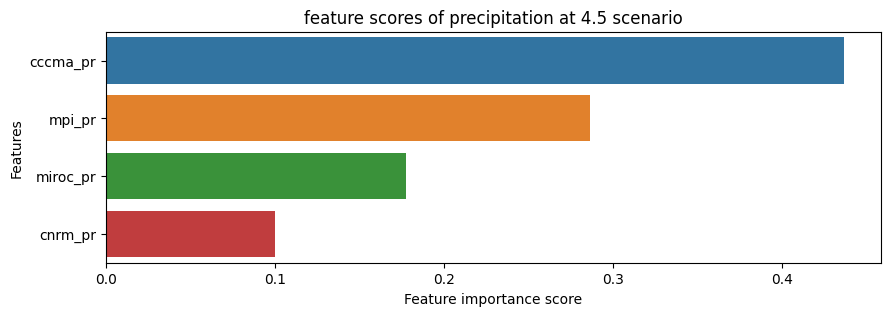

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of precipitation at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = rfmodel.predict(X_train)
Y_test_pred = rfmodel.predict(X_test)

In [ ]:
df_pred = pd.DataFrame(y_test, columns=['ensemble_pr'])
df_pred['predicted_pr']= Y_test_pred
df_pred['Date'] = pd.to_datetime(data_test.Year, format='%Y/%m/%d')
df_pred['station_id'] = data_test['station_id']
#df_pred = df_pred.reset_index()
df_pred=df_pred[['Date','station_id','ensemble_pr','predicted_pr']]
df_pred = df_pred.set_index('Date')
df_pred.head()

,station_id,ensemble_pr,predicted_pr
Date,,,
2082-01-01,0,0.21,0.21
2082-01-02,0,0.21,0.21
2082-01-03,0,0.21,0.21
2082-01-04,0,0.21,0.21
2082-01-05,0,0.21,0.21


<Axes: xlabel='Date'>

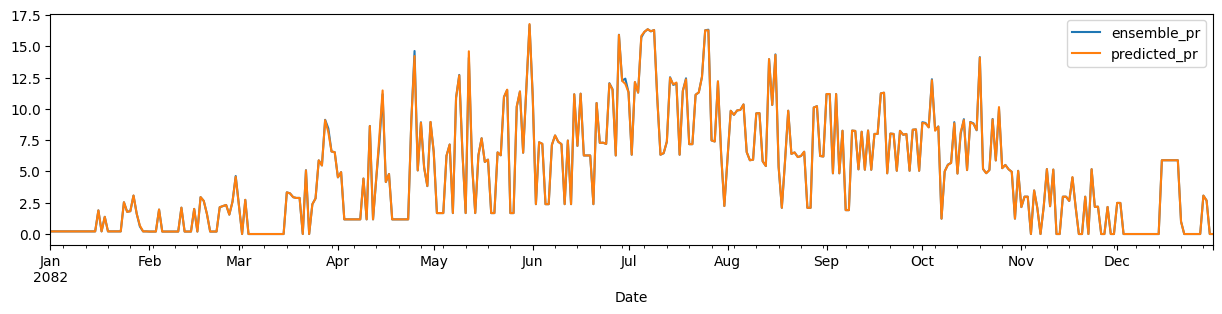

In [ ]:
df_pred[['ensemble_pr','predicted_pr']].loc[df_pred.station_id == 0][:365].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.013303205810771494
MSE is 0.0040699475537154094
RMSE is 0.06379614058636626
R2 is 0.9997572617790147


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))

MSE train: 0.001, test: 0.004


> <font color='orangered'> **Temprature**

>> <font color='green'> **Tmax**

In [ ]:
X_train = data_train[['cnrm_tmax',	'miroc_tmax',	'cccma_tmax',	'mpi_tmax']]
y_train = data_train[['ensemble_tmax']]

In [ ]:
X_test = data_test[['cnrm_tmax',	'miroc_tmax',	'cccma_tmax',	'mpi_tmax']]
y_test = data_test[['ensemble_tmax']]

In [ ]:
X_test.describe()

,cnrm_tmax,miroc_tmax,cccma_tmax,mpi_tmax
count,26296.000000,26296.000000,26296.000000,26296.00
mean,27.142470,27.057236,26.826628,inf
std,4.648845,3.830222,3.240212,NaN
min,11.420000,16.190000,18.930000,6.91
25%,23.430000,24.130000,24.190000,25.04
50%,26.390000,26.300000,26.585000,27.67
75%,30.862500,29.720000,29.140000,32.14
max,42.200000,40.110000,41.160000,inf


In [ ]:
#fill those inf with some value
value = X_test['mpi_tmax'].quantile(0.98)
X_test = X_test.replace(np.inf, value)

In [ ]:
#This removes the rows that contain infinity or NaN values
#X_test=X_test[np.isfinite(X_test).all(1)]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor()
rfmodel.fit(X_train, y_train)

<ipython-input-124-2d03af3fa59c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfmodel.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
# view the feature scores
train=data_train[['cnrm_tmax',	'miroc_tmax',	'cccma_tmax',	'mpi_tmax']]
feature_scores = pd.Series(rfmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

cnrm_tmax     0.618612
miroc_tmax    0.182272
mpi_tmax      0.138686
cccma_tmax    0.060430
dtype: float64

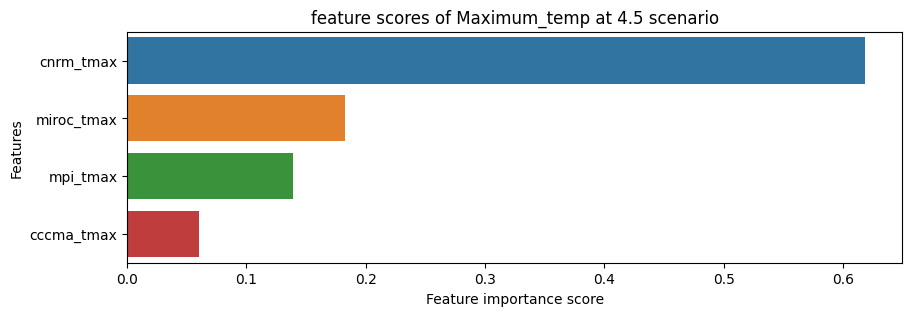

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of Maximum_temp at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = rfmodel.predict(X_train)
Y_test_pred = rfmodel.predict(X_test)

In [ ]:
df_pred = pd.DataFrame(y_test, columns=['ensemble_tmax'])
df_pred['predicted_tmax']= Y_test_pred
df_pred['Date'] = pd.to_datetime(data_test.Year, format='%Y/%m/%d')
df_pred['station_id'] = data_test['station_id']
#df_pred = df_pred.reset_index()
df_pred=df_pred[['Date','station_id','ensemble_tmax','predicted_tmax']]
df_pred = df_pred.set_index('Date')
df_pred.head()

,station_id,ensemble_tmax,predicted_tmax
Date,,,
2082-01-01,0,31.0375,30.978275
2082-01-02,0,30.2500,30.171025
2082-01-03,0,29.7125,29.666600
2082-01-04,0,29.7950,29.783975
2082-01-05,0,29.8250,29.888725


<Axes: xlabel='Date'>

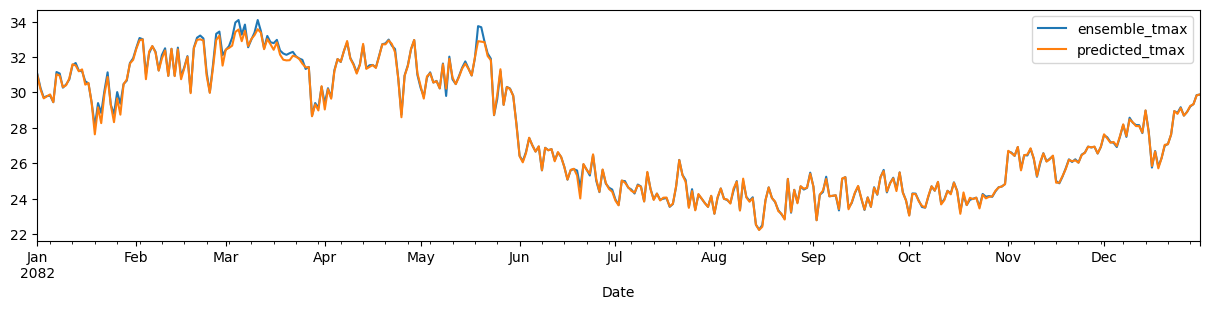

In [ ]:
df_pred[['ensemble_tmax','predicted_tmax']].loc[df_pred.station_id == 0][:365].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.10782499302783656
MSE is 0.05900127012955278
RMSE is 0.24290177053606007
R2 is 0.9954789118430898


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))

MSE train: 0.002, test: 0.059


>> <font color='green'>**Tmin**

In [ ]:
X_train = data_train[['cnrm_tmin',	'miroc_tmin',	'cccma_tmin',	'mpi_tmin']]
y_train = data_train[['ensemble_tmin']]

In [ ]:
X_test = data_test[['cnrm_tmin',	'miroc_tmin',	'cccma_tmin',	'mpi_tmin']]
y_test = data_test[['ensemble_tmin']]

In [ ]:
X_test.describe()

,cnrm_tmin,miroc_tmin,cccma_tmin,mpi_tmin
count,26296.000000,26296.000,26296.000000,26296.000000
mean,14.135045,inf,14.325735,14.179610
std,1.944643,NaN,1.586113,1.508203
min,6.590000,7.990,6.490000,7.750000
25%,13.060000,14.880,13.670000,13.240000
50%,14.320000,16.295,14.700000,14.480000
75%,15.470000,17.650,15.430000,15.320000
max,20.370000,inf,18.160000,21.640000


In [ ]:
#fill those inf with some value
value = X_test['miroc_tmin'].quantile(0.98)
X_test = X_test.replace(np.inf, value)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor()
rfmodel.fit(X_train, y_train)

<ipython-input-135-2d03af3fa59c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfmodel.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
# view the feature scores
train=data_train[['cnrm_tmin',	'miroc_tmin',	'cccma_tmin',	'mpi_tmin']]
feature_scores = pd.Series(rfmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

mpi_tmin      0.608127
miroc_tmin    0.175744
cccma_tmin    0.138603
cnrm_tmin     0.077526
dtype: float64

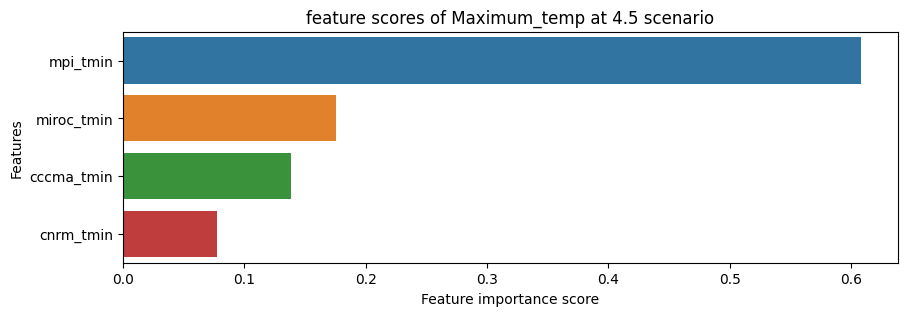

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of Maximum_temp at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = rfmodel.predict(X_train)
Y_test_pred = rfmodel.predict(X_test)

In [ ]:
df_pred = pd.DataFrame(y_test, columns=['ensemble_tmin'])
df_pred['predicted_tmin']= Y_test_pred
df_pred['Date'] = pd.to_datetime(data_test.Year, format='%Y/%m/%d')
df_pred['station_id'] = data_test['station_id']
#df_pred = df_pred.reset_index()
df_pred=df_pred[['Date','station_id','ensemble_tmin','predicted_tmin']]
df_pred = df_pred.set_index('Date')
df_pred.head()

,station_id,ensemble_tmin,predicted_tmin
Date,,,
2082-01-01,0,14.2900,14.28520
2082-01-02,0,13.9750,13.90990
2082-01-03,0,14.2575,14.21190
2082-01-04,0,14.2025,14.18045
2082-01-05,0,14.6850,14.67430


<Axes: xlabel='Date'>

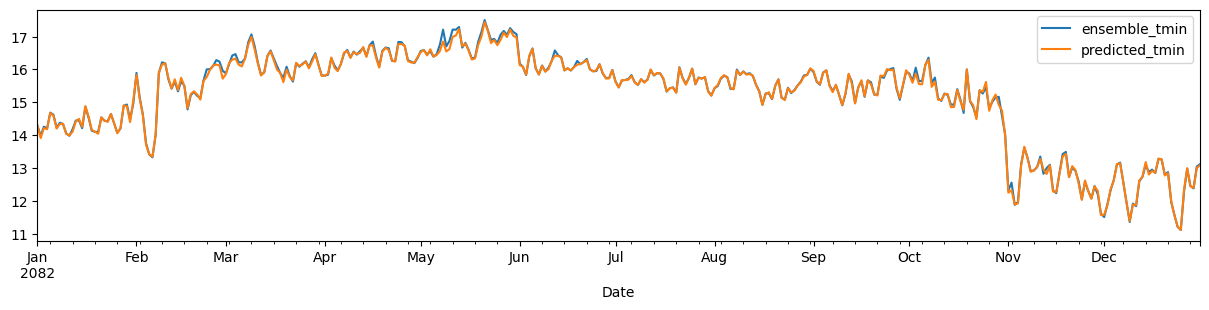

In [ ]:
df_pred[['ensemble_tmin','predicted_tmin']].loc[df_pred.station_id == 0][:365].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.04650397240416808
MSE is 0.01008623814053457
RMSE is 0.10043026506255258
R2 is 0.9953086298018726


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))

MSE train: 0.000, test: 0.010


#### **ET**

##### 4.5

In [ ]:
data=pd.read_csv('../content/drive/My Drive/Colab Notebooks/Drought/GilgelGibe/4.5Ensemble.csv')
data['Year']=pd.to_datetime(data.Year, format='%m/%d/%Y')
data.tail()

,Year,station_id,cnrm_pr,miroc_pr,cccma_pr,mpi_pr,ensemble_pr,cnrm_tmax,miroc_tmax,cccma_tmax,mpi_tmax,ensemble_tmax,cnrm_tmin,miroc_tmin,cccma_tmin,mpi_tmin,ensemble_tmin
131483,2099-12-27,3,0.0,0.0,0.00,8.07,2.0175,28.33,26.75,27.48,26.00,27.140,9.01,11.29,8.61,9.84,9.6875
131484,2099-12-28,3,0.0,0.0,0.00,0.00,0.0000,28.30,26.87,27.50,26.61,27.320,9.40,13.36,8.80,8.48,10.0100
131485,2099-12-29,3,0.0,0.0,0.00,0.00,0.0000,28.54,26.95,26.91,26.50,27.225,9.74,15.90,10.02,8.47,11.0325
131486,2099-12-30,3,0.0,0.0,0.00,0.00,0.0000,28.37,26.67,24.96,26.32,26.580,10.90,11.90,9.67,8.52,10.2475
131487,2099-12-31,3,0.0,0.0,7.18,0.00,1.7950,27.32,26.68,25.98,27.32,26.825,10.28,12.80,9.61,8.70,10.3475


In [ ]:
data_train=data.loc[data.Year <= '2081-12-31']
data_test=data.loc[data.Year > '2081-12-31']

In [ ]:
data_train.shape, data_test.shape

((105192, 17), (26296, 17))

> <font color='orangered'>**Precipitation**

In [ ]:
X_train = data_train[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
y_train = data_train[['ensemble_pr']]

In [ ]:
X_test = data_test[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
y_test = data_test[['ensemble_pr']]

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
dtmodel = ExtraTreesRegressor()
dtmodel.fit(X_train, y_train)

<ipython-input-148-f69d81e900f7>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dtmodel.fit(X_train, y_train)


ExtraTreesRegressor()

In [ ]:
# view the feature scores
train=data_train[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
feature_scores = pd.Series(rfmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

mpi_pr      0.608127
miroc_pr    0.175744
cccma_pr    0.138603
cnrm_pr     0.077526
dtype: float64

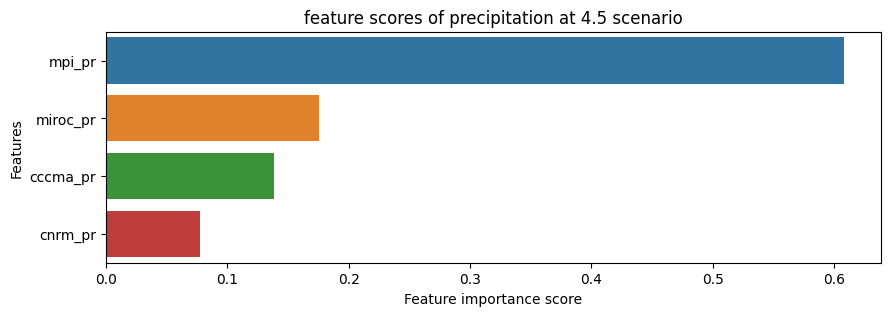

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of precipitation at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = dtmodel.predict(X_train)
Y_test_pred = dtmodel.predict(X_test)

In [ ]:
df_pred = pd.DataFrame(y_test, columns=['ensemble_pr'])
df_pred['predicted_pr']= Y_test_pred
df_pred['Date'] = pd.to_datetime(data_test.Year, format='%Y/%m/%d')
df_pred['station_id'] = data_test['station_id']
#df_pred = df_pred.reset_index()
df_pred=df_pred[['Date','station_id','ensemble_pr','predicted_pr']]
df_pred = df_pred.set_index('Date')
df_pred.head()

,station_id,ensemble_pr,predicted_pr
Date,,,
2082-01-01,0,0.210,0.2100
2082-01-02,0,0.210,0.2100
2082-01-03,0,1.535,1.5342
2082-01-04,0,1.680,1.6799
2082-01-05,0,0.210,0.2100


<Axes: xlabel='Date'>

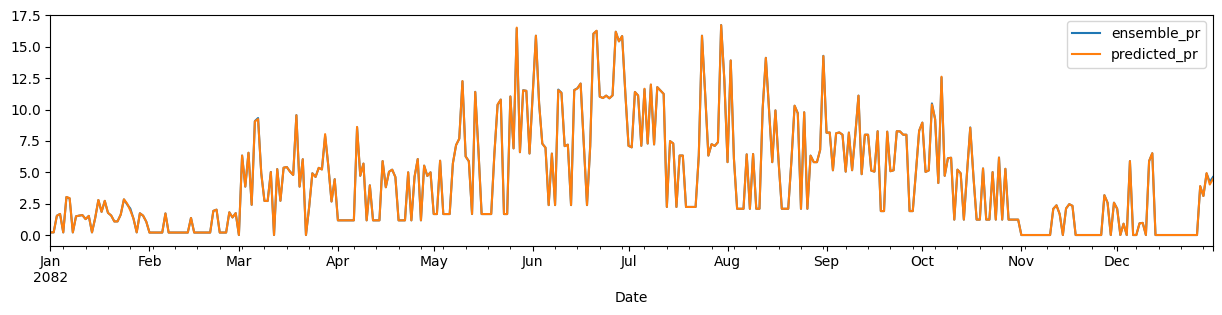

In [ ]:
df_pred[['ensemble_pr','predicted_pr']].loc[df_pred.station_id == 0][:365].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.004682125608462564
MSE is 0.0008068277727838821
RMSE is 0.028404713918360136
R2 is 0.9999515573312446


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))

MSE train: 0.000, test: 0.001


> <font color='orangered'> **Temprature**

>> <font color='green'> **Tmax**

In [ ]:
X_train = data_train[['cnrm_tmax',	'miroc_tmax',	'cccma_tmax',	'mpi_tmax']]
y_train = data_train[['ensemble_tmax']]

In [ ]:
X_test = data_test[['cnrm_tmax',	'miroc_tmax',	'cccma_tmax',	'mpi_tmax']]
y_test = data_test[['ensemble_tmax']]

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
dtmodel = ExtraTreesRegressor()
dtmodel.fit(X_train, y_train)

<ipython-input-158-f69d81e900f7>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dtmodel.fit(X_train, y_train)


ExtraTreesRegressor()

In [ ]:
# view the feature scores
train=data_train[['cnrm_tmax',	'miroc_tmax',	'cccma_tmax',	'mpi_tmax']]
feature_scores = pd.Series(rfmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

mpi_tmax      0.603162
miroc_tmax    0.176534
cccma_tmax    0.142200
cnrm_tmax     0.078104
dtype: float64

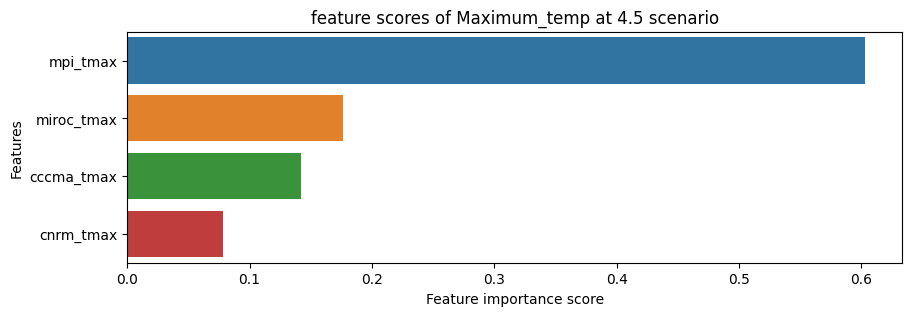

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of Maximum_temp at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = dtmodel.predict(X_train)
Y_test_pred = dtmodel.predict(X_test)

In [ ]:
df_pred = pd.DataFrame(y_test, columns=['ensemble_tmax'])
df_pred['predicted_tmax']= Y_test_pred
df_pred['Date'] = pd.to_datetime(data_test.Year, format='%Y/%m/%d')
df_pred['station_id'] = data_test['station_id']
#df_pred = df_pred.reset_index()
df_pred=df_pred[['Date','station_id','ensemble_tmax','predicted_tmax']]
df_pred = df_pred.set_index('Date')
df_pred.head()

,station_id,ensemble_tmax,predicted_tmax
Date,,,
2082-01-01,0,27.0600,27.084400
2082-01-02,0,27.7675,27.741350
2082-01-03,0,26.6100,26.567975
2082-01-04,0,26.0000,26.049300
2082-01-05,0,25.6100,25.730300


<Axes: xlabel='Date'>

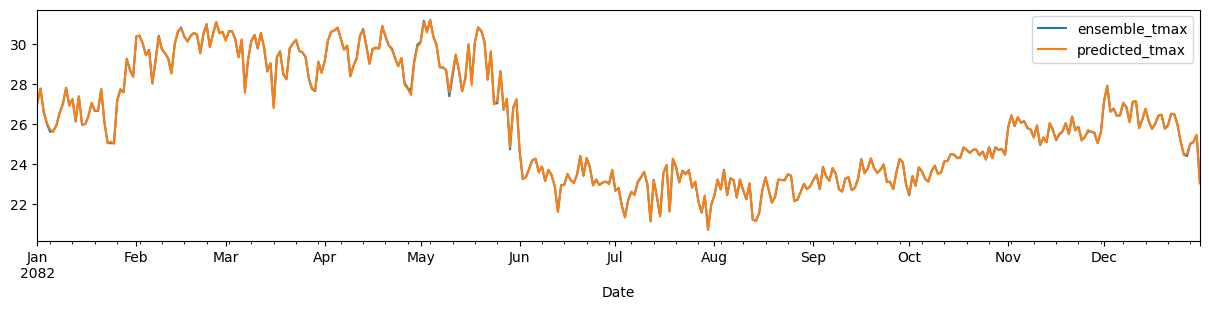

In [ ]:
df_pred[['ensemble_tmax','predicted_tmax']].loc[df_pred.station_id == 0][:365].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.034282564838758606
MSE is 0.00594335938229676
RMSE is 0.07709318635454601
R2 is 0.9993510274155012


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))

MSE train: 0.000, test: 0.006


>> <font color='green'>**Tmin**

In [ ]:
X_train = data_train[['cnrm_tmin',	'miroc_tmin',	'cccma_tmin',	'mpi_tmin']]
y_train = data_train[['ensemble_tmin']]

In [ ]:
X_test = data_test[['cnrm_tmin',	'miroc_tmin',	'cccma_tmin',	'mpi_tmin']]
y_test = data_test[['ensemble_tmin']]

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etmodel = ExtraTreesRegressor()
etmodel.fit(X_train, y_train)

<ipython-input-124-7487cf28f784>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  etmodel.fit(X_train, y_train)


ExtraTreesRegressor()

In [ ]:
# view the feature scores
train=data_train[['cnrm_tmin',	'miroc_tmin',	'cccma_tmin',	'mpi_tmin']]
feature_scores = pd.Series(etmodel.feature_importances_, index=train.columns).sort_values(ascending=False)
feature_scores

cccma_tmin    0.351481
cnrm_tmin     0.261218
mpi_tmin      0.212311
miroc_tmin    0.174990
dtype: float64

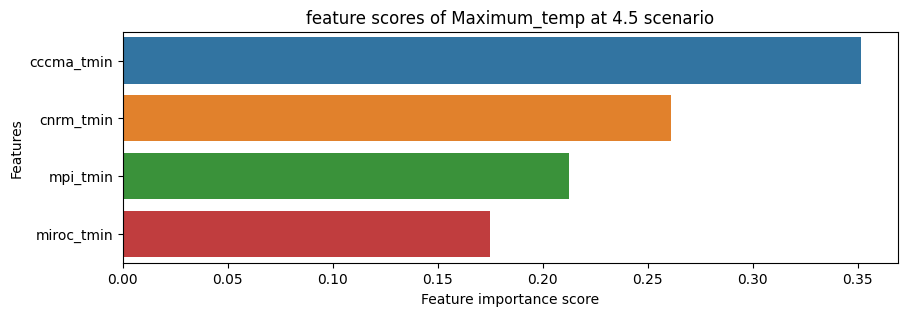

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of Maximum_temp at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = etmodel.predict(X_train)
Y_test_pred = etmodel.predict(X_test)

In [ ]:
df_pred = pd.DataFrame(y_test, columns=['ensemble_tmin'])
df_pred['predicted_tmin']= Y_test_pred
df_pred['Date'] = pd.to_datetime(data_test.Year, format='%Y/%m/%d')
df_pred['station_id'] = data_test['station_id']
#df_pred = df_pred.reset_index()
df_pred=df_pred[['Date','station_id','ensemble_tmin','predicted_tmin']]
df_pred = df_pred.set_index('Date')
df_pred.head()

,station_id,ensemble_tmin,predicted_tmin
Date,,,
2082-01-01,0,12.7000,12.695475
2082-01-02,0,13.2100,13.205375
2082-01-03,0,12.7575,12.760900
2082-01-04,0,12.9500,12.981225
2082-01-05,0,13.4600,13.468075


<Axes: xlabel='Date'>

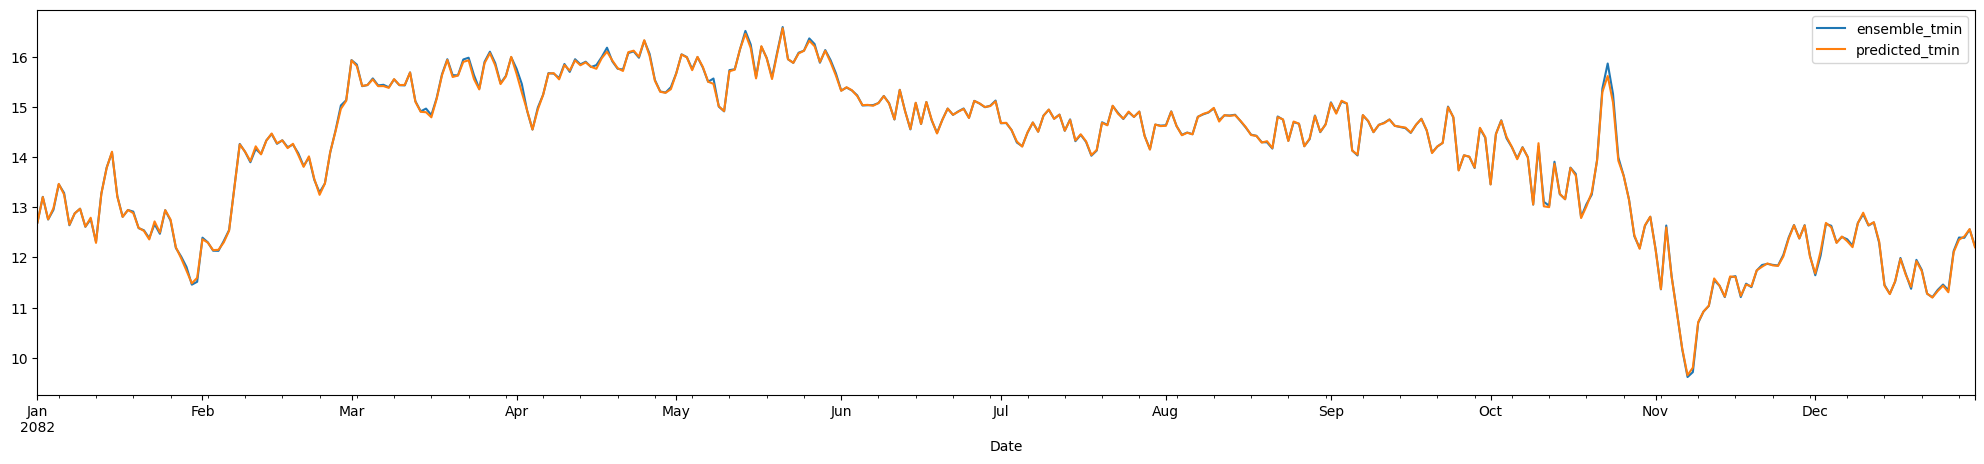

In [ ]:
df_pred[['ensemble_tmin','predicted_tmin']].loc[df_pred.station_id == 0][:365].plot(figsize=(25, 5))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.01577691664131421
MSE is 0.0010820032157932745
RMSE is 0.0328938172882576
R2 is 0.9995953471189779


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))
#print(f'Overfitting indicator: {mean_squared_error(y_test, Y_test_pred)} > {mean_squared_error(y_train, Y_train_pred)}')

MSE train: 0.000, test: 0.001


##### 8.5

In [ ]:
data=pd.read_csv('../content/drive/My Drive/Colab Notebooks/Drought/GilgelGibe/8.5Ensemble.csv')
data['Year']=pd.to_datetime(data.Year, format='%m/%d/%Y')
data.head()

,Year,station_id,cnrm_pr,miroc_pr,cccma_pr,mpi_pr,ensemble_pr,cnrm_tmax,miroc_tmax,cccma_tmax,mpi_tmax,ensemble_tmax,cnrm_tmin,miroc_tmin,cccma_tmin,mpi_tmin,ensemble_tmin
0,2010-01-01,0,0.84,5.47,5.40,0.0,2.9275,23.03,24.75,22.28,20.69,22.6875,13.52,14.95,10.68,11.57,12.6800
1,2010-01-02,0,0.84,6.16,0.00,0.0,1.7500,22.35,21.38,26.53,21.05,22.8275,12.86,13.99,9.93,11.94,12.1800
2,2010-01-03,0,0.84,6.12,5.59,0.0,3.1375,23.23,21.35,25.82,16.26,21.6650,12.11,13.92,13.18,12.84,13.0125
3,2010-01-04,0,0.84,6.40,7.16,0.0,3.6000,25.05,22.55,19.85,21.46,22.2275,11.94,14.62,12.54,11.53,12.6575
4,2010-01-05,0,0.84,5.13,0.00,0.0,1.4925,26.40,25.07,26.96,21.47,24.9750,13.26,14.50,11.16,10.66,12.3950


In [ ]:
data_train=data.loc[data.Year <= '2081-12-31']
data_test=data.loc[data.Year > '2081-12-31']

In [ ]:
data_train.shape, data_test.shape

((105192, 17), (26296, 17))

> <font color='orangered'>**Precipitation**

In [ ]:
X_train = data_train[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
y_train = data_train[['ensemble_pr']]

In [ ]:
X_test = data_test[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
y_test = data_test[['ensemble_pr']]

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etmodel = ExtraTreesRegressor()
etmodel.fit(X_train, y_train)

<ipython-input-8-7487cf28f784>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  etmodel.fit(X_train, y_train)


ExtraTreesRegressor()

In [ ]:
# view the feature scores
train=data_train[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
feature_scores = pd.Series(etmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

cccma_pr    0.328204
mpi_pr      0.296251
miroc_pr    0.224402
cnrm_pr     0.151144
dtype: float64

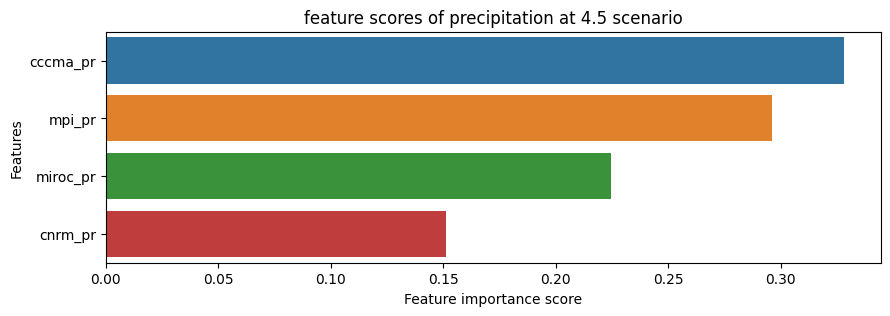

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of precipitation at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = etmodel.predict(X_train)
Y_test_pred = etmodel.predict(X_test)

In [ ]:
df_pred = pd.DataFrame(y_test, columns=['ensemble_pr'])
df_pred['predicted_pr']= Y_test_pred
df_pred['Date'] = pd.to_datetime(data_test.Year, format='%Y/%m/%d')
df_pred['station_id'] = data_test['station_id']
#df_pred = df_pred.reset_index()
df_pred=df_pred[['Date','station_id','ensemble_pr','predicted_pr']]
df_pred = df_pred.set_index('Date')
df_pred.head()

,station_id,ensemble_pr,predicted_pr
Date,,,
2082-01-01,0,0.21,0.21
2082-01-02,0,0.21,0.21
2082-01-03,0,0.21,0.21
2082-01-04,0,0.21,0.21
2082-01-05,0,0.21,0.21


<Axes: xlabel='Date'>

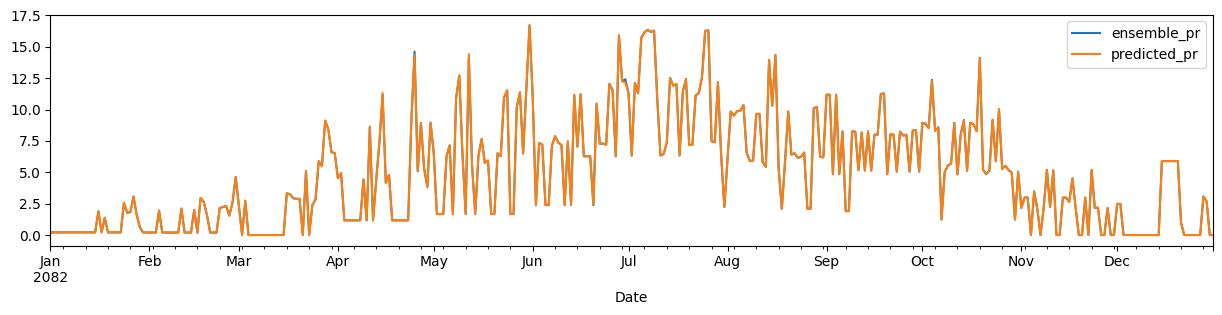

In [ ]:
df_pred[['ensemble_pr','predicted_pr']].loc[df_pred.station_id == 0][:365].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.005603268557960749
MSE is 0.0010267545761237478
RMSE is 0.03204301134606028
R2 is 0.9999387627049471


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))

MSE train: 0.000, test: 0.001


> <font color='orangered'> **Temprature**

>> <font color='green'> **Tmax**

In [ ]:
X_train = data_train[['cnrm_tmax',	'miroc_tmax',	'cccma_tmax',	'mpi_tmax']]
y_train = data_train[['ensemble_tmax']]

In [ ]:
X_test = data_test[['cnrm_tmax',	'miroc_tmax',	'cccma_tmax',	'mpi_tmax']]
y_test = data_test[['ensemble_tmax']]

In [ ]:
X_test.describe()

,cnrm_tmax,miroc_tmax,cccma_tmax,mpi_tmax
count,26296.000000,26296.000000,26296.000000,26296.00
mean,27.142470,27.057236,26.826628,inf
std,4.648845,3.830222,3.240212,NaN
min,11.420000,16.190000,18.930000,6.91
25%,23.430000,24.130000,24.190000,25.04
50%,26.390000,26.300000,26.585000,27.67
75%,30.862500,29.720000,29.140000,32.14
max,42.200000,40.110000,41.160000,inf


In [ ]:
#fill those inf with some value
value = X_test['mpi_tmax'].quantile(0.98)
X_test = X_test.replace(np.inf, value)

In [ ]:
#This removes the rows that contain infinity or NaN values
#X_test=X_test[np.isfinite(X_test).all(1)]

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etmodel = ExtraTreesRegressor()
etmodel.fit(X_train, y_train)

<ipython-input-20-7487cf28f784>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  etmodel.fit(X_train, y_train)


ExtraTreesRegressor()

In [ ]:
# view the feature scores
train=data_train[['cnrm_tmax',	'miroc_tmax',	'cccma_tmax',	'mpi_tmax']]
feature_scores = pd.Series(etmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

miroc_tmax    0.294694
cnrm_tmax     0.282990
cccma_tmax    0.246912
mpi_tmax      0.175404
dtype: float64

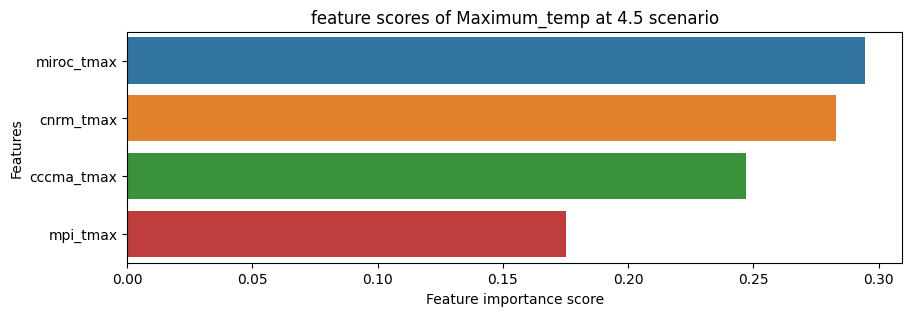

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of Maximum_temp at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = etmodel.predict(X_train)
Y_test_pred = etmodel.predict(X_test)

In [ ]:
df_pred = pd.DataFrame(y_test, columns=['ensemble_tmax'])
df_pred['predicted_tmax']= Y_test_pred
df_pred['Date'] = pd.to_datetime(data_test.Year, format='%Y/%m/%d')
df_pred['station_id'] = data_test['station_id']
#df_pred = df_pred.reset_index()
df_pred=df_pred[['Date','station_id','ensemble_tmax','predicted_tmax']]
df_pred = df_pred.set_index('Date')
df_pred.head()

,station_id,ensemble_tmax,predicted_tmax
Date,,,
2082-01-01,0,31.0375,31.032125
2082-01-02,0,30.2500,30.207800
2082-01-03,0,29.7125,29.697700
2082-01-04,0,29.7950,29.836050
2082-01-05,0,29.8250,29.923600


<Axes: xlabel='Date'>

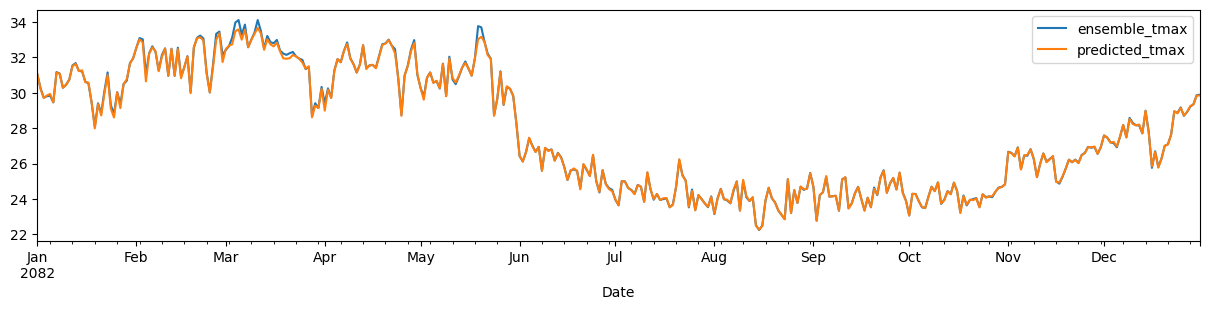

In [ ]:
df_pred[['ensemble_tmax','predicted_tmax']].loc[df_pred.station_id == 0][:365].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.07520257992318183
MSE is 0.04576094440919747
RMSE is 0.213918078733887
R2 is 0.9964934777952548


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))

MSE train: 0.000, test: 0.046


>> <font color='green'>**Tmin**

In [ ]:
X_train = data_train[['cnrm_tmin',	'miroc_tmin',	'cccma_tmin',	'mpi_tmin']]
y_train = data_train[['ensemble_tmin']]

In [ ]:
X_test = data_test[['cnrm_tmin',	'miroc_tmin',	'cccma_tmin',	'mpi_tmin']]
y_test = data_test[['ensemble_tmin']]

In [ ]:
#fill those inf with some value
value = X_test['miroc_tmin'].quantile(0.98)
X_test = X_test.replace(np.inf, value)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etmodel = ExtraTreesRegressor()
etmodel.fit(X_train, y_train)

<ipython-input-32-7487cf28f784>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  etmodel.fit(X_train, y_train)


ExtraTreesRegressor()

In [ ]:
# view the feature scores
train=data_train[['cnrm_tmin',	'miroc_tmin',	'cccma_tmin',	'mpi_tmin']]
feature_scores = pd.Series(etmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

cccma_tmin    0.340039
mpi_tmin      0.248957
cnrm_tmin     0.239112
miroc_tmin    0.171892
dtype: float64

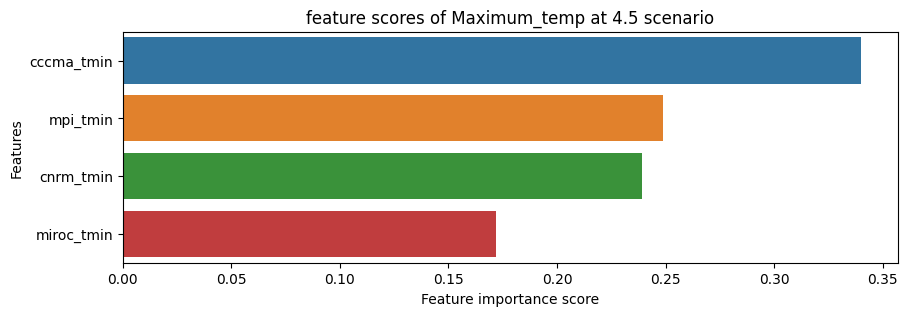

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of Maximum_temp at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = etmodel.predict(X_train)
Y_test_pred = etmodel.predict(X_test)

In [ ]:
df_pred = pd.DataFrame(y_test, columns=['ensemble_tmin'])
df_pred['predicted_tmin']= Y_test_pred
df_pred['Date'] = pd.to_datetime(data_test.Year, format='%Y/%m/%d')
df_pred['station_id'] = data_test['station_id']
#df_pred = df_pred.reset_index()
df_pred=df_pred[['Date','station_id','ensemble_tmin','predicted_tmin']]
df_pred = df_pred.set_index('Date')
df_pred.head()

,station_id,ensemble_tmin,predicted_tmin
Date,,,
2082-01-01,0,14.2900,14.296350
2082-01-02,0,13.9750,13.942825
2082-01-03,0,14.2575,14.244750
2082-01-04,0,14.2025,14.239275
2082-01-05,0,14.6850,14.688800


<Axes: xlabel='Date'>

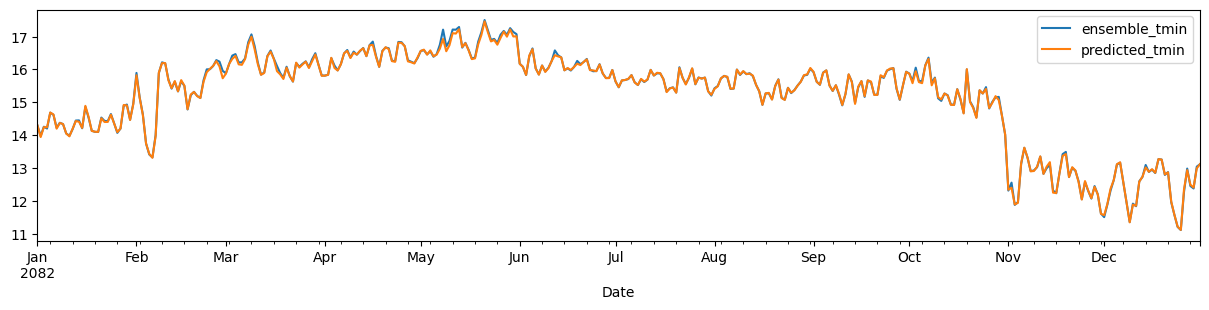

In [ ]:
df_pred[['ensemble_tmin','predicted_tmin']].loc[df_pred.station_id == 0][:365].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.029990226016884673
MSE is 0.0068124794579049715
RMSE is 0.08253774565557852
R2 is 0.9968313396274345


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))
#print(f'Overfitting indicator: {mean_squared_error(y_test, Y_test_pred)} > {mean_squared_error(y_train, Y_train_pred)}')

MSE train: 0.000, test: 0.007


#### **CB**

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 4.6 MB/s eta 0:00:00


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

##### 4.5

In [ ]:
data=pd.read_csv('../content/drive/My Drive/Colab Notebooks/Drought/GilgelGibe/4.5Ensemble.csv')
data['Year']=pd.to_datetime(data.Year, format='%m/%d/%Y')
data.tail()

,Year,station_id,cnrm_pr,miroc_pr,cccma_pr,mpi_pr,ensemble_pr,cnrm_tmax,miroc_tmax,cccma_tmax,mpi_tmax,ensemble_tmax,cnrm_tmin,miroc_tmin,cccma_tmin,mpi_tmin,ensemble_tmin
131483,2099-12-27,3,0.0,0.0,0.00,8.07,2.0175,28.33,26.75,27.48,26.00,27.140,9.01,11.29,8.61,9.84,9.6875
131484,2099-12-28,3,0.0,0.0,0.00,0.00,0.0000,28.30,26.87,27.50,26.61,27.320,9.40,13.36,8.80,8.48,10.0100
131485,2099-12-29,3,0.0,0.0,0.00,0.00,0.0000,28.54,26.95,26.91,26.50,27.225,9.74,15.90,10.02,8.47,11.0325
131486,2099-12-30,3,0.0,0.0,0.00,0.00,0.0000,28.37,26.67,24.96,26.32,26.580,10.90,11.90,9.67,8.52,10.2475
131487,2099-12-31,3,0.0,0.0,7.18,0.00,1.7950,27.32,26.68,25.98,27.32,26.825,10.28,12.80,9.61,8.70,10.3475


In [ ]:
data_train=data.loc[data.Year <= '2081-12-31']
data_test=data.loc[data.Year > '2081-12-31']

In [ ]:
data_train.shape, data_test.shape

((105192, 17), (26296, 17))

> <font color='orangered'>**Precipitation**

In [ ]:
X_train = data_train[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
y_train = data_train[['ensemble_pr']]

In [ ]:
X_test = data_test[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
y_test = data_test[['ensemble_pr']]

In [ ]:
cbmodel = CatBoostRegressor()
cbmodel.fit(X_train, y_train)

Learning rate set to 0.085438
0:	learn: 3.8153094	total: 64.4ms	remaining: 1m 4s
1:	learn: 3.5063948	total: 79ms	remaining: 39.4s
2:	learn: 3.2285575	total: 92.5ms	remaining: 30.7s
3:	learn: 2.9718963	total: 106ms	remaining: 26.5s
4:	learn: 2.7401113	total: 119ms	remaining: 23.7s
5:	learn: 2.5300995	total: 132ms	remaining: 21.9s
6:	learn: 2.3296974	total: 145ms	remaining: 20.6s
7:	learn: 2.1457680	total: 158ms	remaining: 19.6s
8:	learn: 1.9784953	total: 171ms	remaining: 18.8s
9:	learn: 1.8288793	total: 188ms	remaining: 18.7s
10:	learn: 1.6891706	total: 202ms	remaining: 18.1s
11:	learn: 1.5590257	total: 215ms	remaining: 17.7s
12:	learn: 1.4404769	total: 228ms	remaining: 17.3s
13:	learn: 1.3319259	total: 241ms	remaining: 17s
14:	learn: 1.2336225	total: 254ms	remaining: 16.7s
15:	learn: 1.1455261	total: 267ms	remaining: 16.4s
16:	learn: 1.0640850	total: 280ms	remaining: 16.2s
17:	learn: 0.9871061	total: 293ms	remaining: 16s
18:	learn: 0.9176518	total: 311ms	remaining: 16s
19:	learn: 0.852

In [ ]:
# view the feature scores
train=data_train[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
feature_scores = pd.Series(cbmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

cccma_pr    30.471747
mpi_pr      28.203020
miroc_pr    24.779571
cnrm_pr     16.545662
dtype: float64

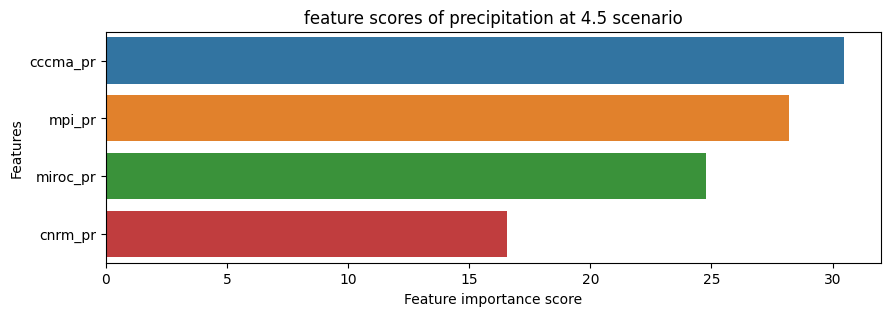

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of precipitation at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = cbmodel.predict(X_train)
Y_test_pred = cbmodel.predict(X_test)

In [ ]:
df_pred1 = pd.DataFrame(y_test, columns=['ensemble_pr'])
df_pred1['predicted_pr']= Y_test_pred
df_pred1['Date'] = pd.to_datetime(data_test.Year, format='%Y/%m/%d')
df_pred1['station_id'] = data_test['station_id']
#df_pred = df_pred.reset_index()
df_pred1=df_pred1[['Date','station_id','ensemble_pr','predicted_pr']]
# df_pred1 = df_pred1.set_index('Date')
df_pred1.head()

,Date,station_id,ensemble_pr,predicted_pr
26298,2082-01-01,0,0.210,0.216994
26299,2082-01-02,0,0.210,0.216994
26300,2082-01-03,0,1.535,1.591353
26301,2082-01-04,0,1.680,1.676840
26302,2082-01-05,0,0.210,0.216994


In [ ]:
df_pred1['Date']=pd.to_datetime(df_pred1.Date, format='%Y/%m/%d')
df_pred1['Year']=df_pred1['Date'].dt.year
df_pred1['Month']=df_pred1['Date'].dt.month
df_pred1

,Date,station_id,ensemble_pr,predicted_pr,Year,Month
26298,2082-01-01,0,0.2100,0.216994,2082,1
26299,2082-01-02,0,0.2100,0.216994,2082,1
26300,2082-01-03,0,1.5350,1.591353,2082,1
26301,2082-01-04,0,1.6800,1.676840,2082,1
26302,2082-01-05,0,0.2100,0.216994,2082,1
...,...,...,...,...,...,...
131483,2099-12-27,3,2.0175,2.000180,2099,12
131484,2099-12-28,3,0.0000,0.000193,2099,12
131485,2099-12-29,3,0.0000,0.000193,2099,12
131486,2099-12-30,3,0.0000,0.000193,2099,12


<Axes: xlabel='Date'>

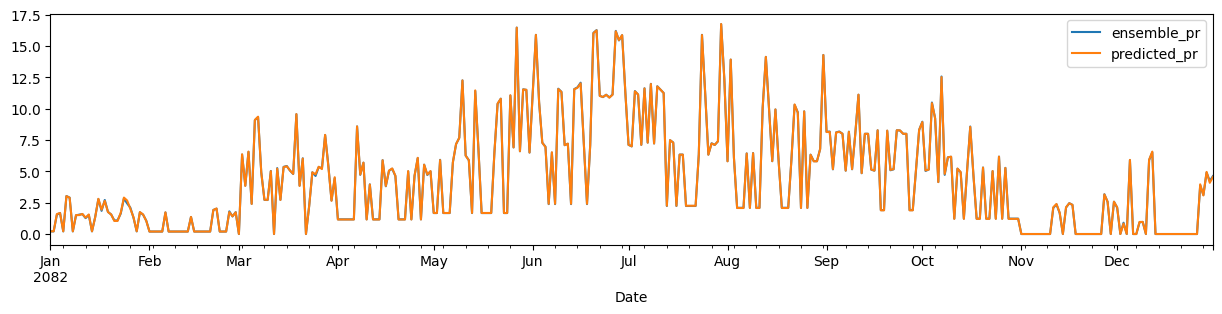

In [ ]:
df_pred1[['ensemble_pr','predicted_pr']].loc[df_pred1.station_id == 0][:365].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.014373770650922001
MSE is 0.0008350143025094583
RMSE is 0.02889661403191485
R2 is 0.9999498649865226


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))

MSE train: 0.001, test: 0.001


> <font color='orangered'> **Temprature**

>> <font color='green'> **Tmax**

In [ ]:
X_train = data_train[['cnrm_tmax',	'miroc_tmax',	'cccma_tmax',	'mpi_tmax']]
y_train = data_train[['ensemble_tmax']]

In [ ]:
X_test = data_test[['cnrm_tmax',	'miroc_tmax',	'cccma_tmax',	'mpi_tmax']]
y_test = data_test[['ensemble_tmax']]

In [ ]:
cbmodel = CatBoostRegressor()
cbmodel.fit(X_train, y_train)

Learning rate set to 0.085438
0:	learn: 2.6836334	total: 41.2ms	remaining: 41.2s
1:	learn: 2.4813939	total: 58.2ms	remaining: 29s
2:	learn: 2.2994153	total: 75.4ms	remaining: 25.1s
3:	learn: 2.1317791	total: 92.8ms	remaining: 23.1s
4:	learn: 1.9750147	total: 109ms	remaining: 21.6s
5:	learn: 1.8332822	total: 124ms	remaining: 20.6s
6:	learn: 1.7028671	total: 141ms	remaining: 20s
7:	learn: 1.5825680	total: 165ms	remaining: 20.4s
8:	learn: 1.4722992	total: 186ms	remaining: 20.5s
9:	learn: 1.3674341	total: 206ms	remaining: 20.4s
10:	learn: 1.2727876	total: 238ms	remaining: 21.4s
11:	learn: 1.1844546	total: 274ms	remaining: 22.6s
12:	learn: 1.1059022	total: 311ms	remaining: 23.6s
13:	learn: 1.0308293	total: 344ms	remaining: 24.2s
14:	learn: 0.9625802	total: 377ms	remaining: 24.7s
15:	learn: 0.9001528	total: 414ms	remaining: 25.5s
16:	learn: 0.8437814	total: 448ms	remaining: 25.9s
17:	learn: 0.7902737	total: 485ms	remaining: 26.5s
18:	learn: 0.7413428	total: 520ms	remaining: 26.8s
19:	learn: 

In [ ]:
# view the feature scores
train=data_train[['cnrm_tmax',	'miroc_tmax',	'cccma_tmax',	'mpi_tmax']]
feature_scores = pd.Series(cbmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

mpi_tmax      30.028431
cnrm_tmax     25.550968
miroc_tmax    24.534784
cccma_tmax    19.885817
dtype: float64

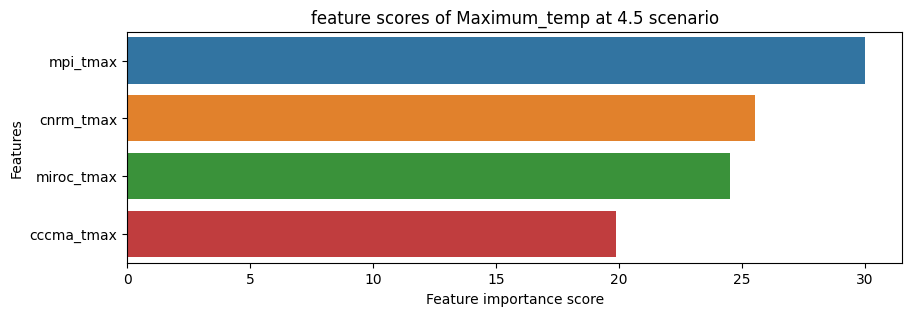

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of Maximum_temp at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = cbmodel.predict(X_train)
Y_test_pred = cbmodel.predict(X_test)

In [ ]:
df_predt1 = pd.DataFrame(y_test, columns=['ensemble_tmax'])
df_predt1['predicted_tmax']= Y_test_pred
df_predt1['Date'] = pd.to_datetime(data_test.Year, format='%Y/%m/%d')
df_predt1['station_id'] = data_test['station_id']
#df_predt1 = df_predt1.reset_index()
df_predt1=df_predt1[['Date','station_id','ensemble_tmax','predicted_tmax']]
# df_predt1 = df_predt1.set_index('Date')
df_predt1.head()

,Date,station_id,ensemble_tmax,predicted_tmax
26298,2082-01-01,0,31.0375,31.095758
26299,2082-01-02,0,30.2500,30.233156
26300,2082-01-03,0,29.7125,29.666900
26301,2082-01-04,0,29.7950,29.803056
26302,2082-01-05,0,29.8250,29.782441


In [ ]:
df_predt1['Date']=pd.to_datetime(df_predt1.Date, format='%Y/%m/%d')
df_predt1['Year']=df_predt1['Date'].dt.year
df_predt1['Month']=df_predt1['Date'].dt.month
df_predt1

,Date,station_id,ensemble_tmax,predicted_tmax,Year,Month
26298,2082-01-01,0,31.0375,31.095758,2082,1
26299,2082-01-02,0,30.2500,30.233156,2082,1
26300,2082-01-03,0,29.7125,29.666900,2082,1
26301,2082-01-04,0,29.7950,29.803056,2082,1
26302,2082-01-05,0,29.8250,29.782441,2082,1
...,...,...,...,...,...,...
131483,2099-12-27,3,29.2275,29.286952,2099,12
131484,2099-12-28,3,30.1525,30.167510,2099,12
131485,2099-12-29,3,29.7475,29.893064,2099,12
131486,2099-12-30,3,27.7775,27.887492,2099,12


<Axes: xlabel='Date'>

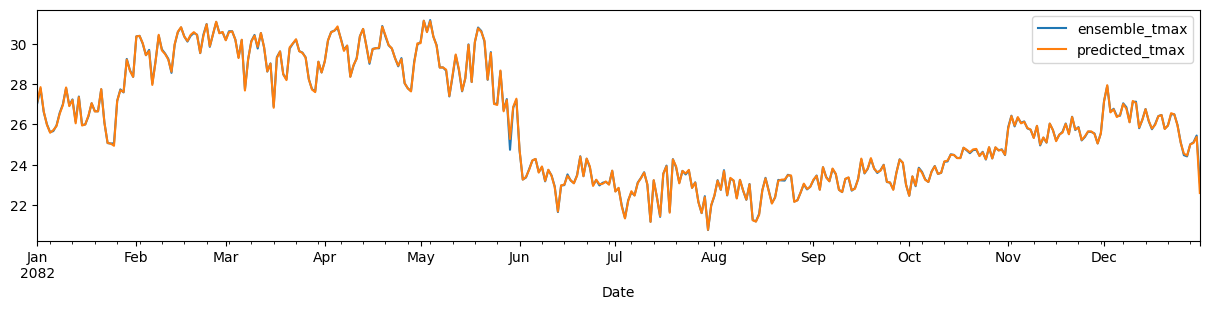

In [ ]:
df_predt1[['ensemble_tmax','predicted_tmax']].loc[df_predt1.station_id == 0][:365].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.033316344272970075
MSE is 0.0055951681344042995
RMSE is 0.07480085650849394
R2 is 0.9993890474239694


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))

MSE train: 0.003, test: 0.006


>> <font color='green'>**Tmin**

In [ ]:
X_train = data_train[['cnrm_tmin',	'miroc_tmin',	'cccma_tmin',	'mpi_tmin']]
y_train = data_train[['ensemble_tmin']]

In [ ]:
X_test = data_test[['cnrm_tmin',	'miroc_tmin',	'cccma_tmin',	'mpi_tmin']]
y_test = data_test[['ensemble_tmin']]

In [ ]:
cbmodel = CatBoostRegressor()
cbmodel.fit(X_train, y_train)

Learning rate set to 0.085438
0:	learn: 1.5369573	total: 87ms	remaining: 1m 26s
1:	learn: 1.4211624	total: 130ms	remaining: 1m 5s
2:	learn: 1.3149761	total: 168ms	remaining: 55.9s
3:	learn: 1.2179462	total: 223ms	remaining: 55.5s
4:	learn: 1.1291989	total: 273ms	remaining: 54.3s
5:	learn: 1.0481493	total: 318ms	remaining: 52.7s
6:	learn: 0.9735205	total: 365ms	remaining: 51.7s
7:	learn: 0.9035596	total: 414ms	remaining: 51.4s
8:	learn: 0.8402666	total: 468ms	remaining: 51.5s
9:	learn: 0.7815441	total: 517ms	remaining: 51.2s
10:	learn: 0.7275613	total: 544ms	remaining: 48.9s
11:	learn: 0.6773509	total: 582ms	remaining: 47.9s
12:	learn: 0.6309351	total: 625ms	remaining: 47.4s
13:	learn: 0.5888804	total: 672ms	remaining: 47.3s
14:	learn: 0.5496763	total: 721ms	remaining: 47.3s
15:	learn: 0.5135193	total: 775ms	remaining: 47.7s
16:	learn: 0.4789420	total: 814ms	remaining: 47.1s
17:	learn: 0.4477440	total: 851ms	remaining: 46.4s
18:	learn: 0.4192663	total: 889ms	remaining: 45.9s
19:	learn: 

In [ ]:
# view the feature scores
train=data_train[['cnrm_tmin',	'miroc_tmin',	'cccma_tmin',	'mpi_tmin']]
feature_scores = pd.Series(cbmodel.feature_importances_, index=train.columns).sort_values(ascending=False)
feature_scores

miroc_tmin    30.842772
cnrm_tmin     24.672723
cccma_tmin    24.091778
mpi_tmin      20.392727
dtype: float64

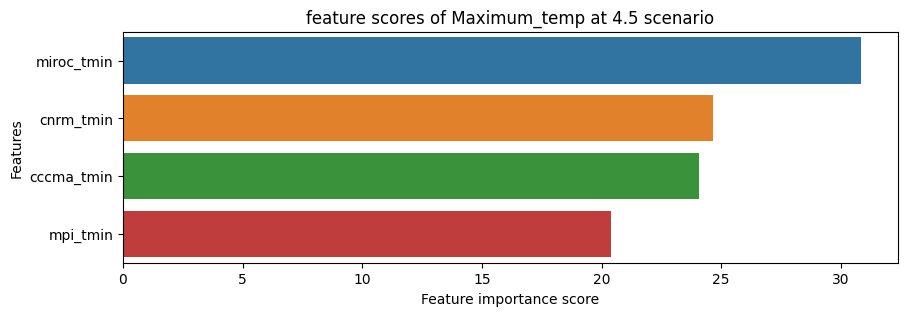

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of Maximum_temp at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = cbmodel.predict(X_train)
Y_test_pred = cbmodel.predict(X_test)

In [ ]:
df_predt2 = pd.DataFrame(y_test, columns=['ensemble_tmin'])
df_predt2['predicted_tmin']= Y_test_pred
df_predt2['Date'] = pd.to_datetime(data_test.Year, format='%Y/%m/%d')
df_predt2['station_id'] = data_test['station_id']
#df_predt2 = df_predt2.reset_index()
df_predt2=df_predt2[['Date','station_id','ensemble_tmin','predicted_tmin']]
# df_predt2 = df_predt2.set_index('Date')
df_predt2.head()

,Date,station_id,ensemble_tmin,predicted_tmin
26298,2082-01-01,0,14.2900,14.305787
26299,2082-01-02,0,13.9750,13.940576
26300,2082-01-03,0,14.2575,14.254507
26301,2082-01-04,0,14.2025,14.175473
26302,2082-01-05,0,14.6850,14.650790


In [ ]:
df_predt2['Date']=pd.to_datetime(df_predt2.Date, format='%Y/%m/%d')
df_predt2['Year']=df_predt2['Date'].dt.year
df_predt2['Month']=df_predt2['Date'].dt.month
df_predt2

,Date,station_id,ensemble_tmin,predicted_tmin,Year,Month
26298,2082-01-01,0,14.2900,14.305787,2082,1
26299,2082-01-02,0,13.9750,13.940576,2082,1
26300,2082-01-03,0,14.2575,14.254507,2082,1
26301,2082-01-04,0,14.2025,14.175473,2082,1
26302,2082-01-05,0,14.6850,14.650790,2082,1
...,...,...,...,...,...,...
131483,2099-12-27,3,13.0650,13.093925,2099,12
131484,2099-12-28,3,12.8425,12.848066,2099,12
131485,2099-12-29,3,12.8700,12.885533,2099,12
131486,2099-12-30,3,11.8300,11.828811,2099,12


<Axes: xlabel='Date'>

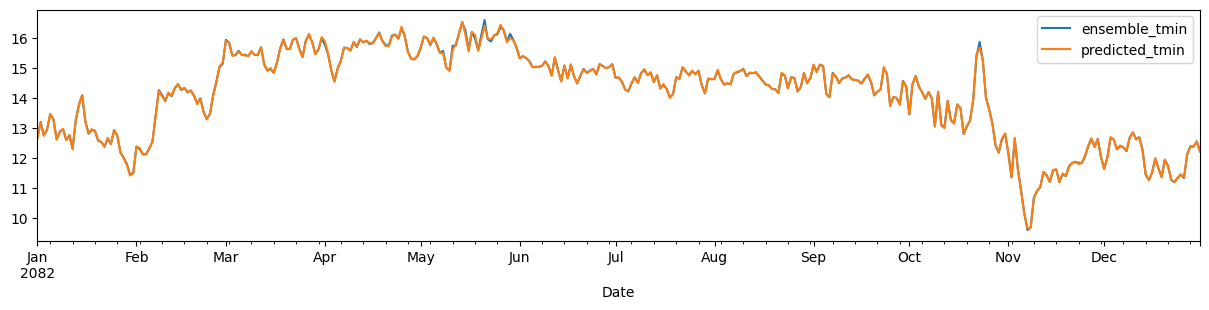

In [ ]:
df_predt2[['ensemble_tmin','predicted_tmin']].loc[df_predt2.station_id == 0][:365].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.013959945383723226
MSE is 0.0007447883716540741
RMSE is 0.02729081112121943
R2 is 0.9997214603839041


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))
#print(f'Overfitting indicator: {mean_squared_error(y_test, Y_test_pred)} > {mean_squared_error(y_train, Y_train_pred)}')

MSE train: 0.000, test: 0.001


##### 8.5

In [ ]:
data=pd.read_csv('../content/drive/My Drive/Colab Notebooks/Drought/GilgelGibe/8.5Ensemble.csv')
data['Year']=pd.to_datetime(data.Year, format='%m/%d/%Y')
data.head()

,Year,station_id,cnrm_pr,miroc_pr,cccma_pr,mpi_pr,ensemble_pr,cnrm_tmax,miroc_tmax,cccma_tmax,mpi_tmax,ensemble_tmax,cnrm_tmin,miroc_tmin,cccma_tmin,mpi_tmin,ensemble_tmin
0,2010-01-01,0,0.84,5.47,5.40,0.0,2.9275,23.03,24.75,22.28,20.69,22.6875,13.52,14.95,10.68,11.57,12.6800
1,2010-01-02,0,0.84,6.16,0.00,0.0,1.7500,22.35,21.38,26.53,21.05,22.8275,12.86,13.99,9.93,11.94,12.1800
2,2010-01-03,0,0.84,6.12,5.59,0.0,3.1375,23.23,21.35,25.82,16.26,21.6650,12.11,13.92,13.18,12.84,13.0125
3,2010-01-04,0,0.84,6.40,7.16,0.0,3.6000,25.05,22.55,19.85,21.46,22.2275,11.94,14.62,12.54,11.53,12.6575
4,2010-01-05,0,0.84,5.13,0.00,0.0,1.4925,26.40,25.07,26.96,21.47,24.9750,13.26,14.50,11.16,10.66,12.3950


In [ ]:
data_train=data.loc[data.Year <= '2081-12-31']
data_test=data.loc[data.Year > '2081-12-31']

In [ ]:
data_train.shape, data_test.shape

((105192, 17), (26296, 17))

> <font color='orangered'>**Precipitation**

In [ ]:
X_train = data_train[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
y_train = data_train[['ensemble_pr']]

In [ ]:
X_test = data_test[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
y_test = data_test[['ensemble_pr']]

In [ ]:
cbmodel = CatBoostRegressor()
cbmodel.fit(X_train, y_train)

Learning rate set to 0.085438
0:	learn: 3.7746353	total: 69.3ms	remaining: 1m 9s
1:	learn: 3.4760511	total: 119ms	remaining: 59.2s
2:	learn: 3.2037198	total: 169ms	remaining: 56.2s
3:	learn: 2.9470646	total: 210ms	remaining: 52.3s
4:	learn: 2.7197421	total: 257ms	remaining: 51.1s
5:	learn: 2.5112477	total: 302ms	remaining: 50.1s
6:	learn: 2.3208609	total: 351ms	remaining: 49.9s
7:	learn: 2.1396775	total: 403ms	remaining: 50s
8:	learn: 1.9733228	total: 453ms	remaining: 49.9s
9:	learn: 1.8204052	total: 502ms	remaining: 49.7s
10:	learn: 1.6800103	total: 557ms	remaining: 50s
11:	learn: 1.5551937	total: 607ms	remaining: 50s
12:	learn: 1.4367687	total: 657ms	remaining: 49.9s
13:	learn: 1.3295429	total: 699ms	remaining: 49.2s
14:	learn: 1.2318493	total: 745ms	remaining: 48.9s
15:	learn: 1.1399495	total: 797ms	remaining: 49s
16:	learn: 1.0608442	total: 848ms	remaining: 49.1s
17:	learn: 0.9836545	total: 889ms	remaining: 48.5s
18:	learn: 0.9146197	total: 931ms	remaining: 48.1s
19:	learn: 0.85057

In [ ]:
# view the feature scores
train=data_train[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
feature_scores = pd.Series(cbmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

cccma_pr    30.025431
mpi_pr      29.081402
miroc_pr    24.255789
cnrm_pr     16.637378
dtype: float64

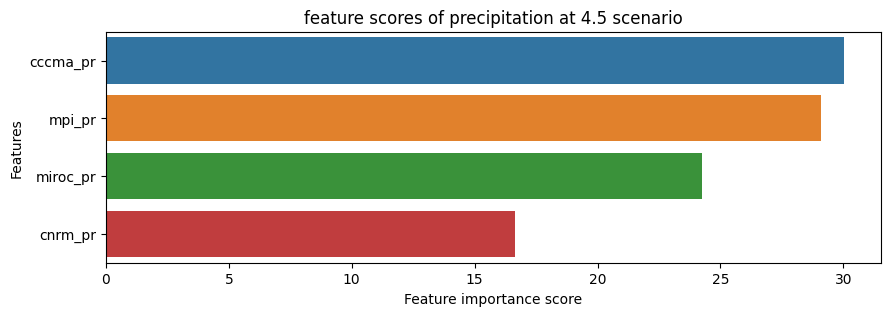

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of precipitation at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = cbmodel.predict(X_train)
Y_test_pred = cbmodel.predict(X_test)

In [ ]:
df_pred2 = pd.DataFrame(y_test, columns=['ensemble_pr'])
df_pred2['predicted_pr']= Y_test_pred
df_pred2['Date'] = pd.to_datetime(data_test.Year, format='%Y/%m/%d')
df_pred2['station_id'] = data_test['station_id']
#df_pred2 = df_pred2.reset_index()
df_pred2=df_pred2[['Date','station_id','ensemble_pr','predicted_pr']]
# df_pred2 = df_pred2.set_index('Date')
df_pred2.head()

,Date,station_id,ensemble_pr,predicted_pr
26298,2082-01-01,0,0.21,0.217605
26299,2082-01-02,0,0.21,0.217605
26300,2082-01-03,0,0.21,0.217605
26301,2082-01-04,0,0.21,0.217605
26302,2082-01-05,0,0.21,0.217605


In [ ]:
df_pred2['Date']=pd.to_datetime(df_pred2.Date, format='%Y/%m/%d')
df_pred2['Year']=df_pred2['Date'].dt.year
df_pred2['Month']=df_pred2['Date'].dt.month
df_pred2

,Date,station_id,ensemble_pr,predicted_pr,Year,Month
26298,2082-01-01,0,0.21,0.217605,2082,1
26299,2082-01-02,0,0.21,0.217605,2082,1
26300,2082-01-03,0,0.21,0.217605,2082,1
26301,2082-01-04,0,0.21,0.217605,2082,1
26302,2082-01-05,0,0.21,0.217605,2082,1
...,...,...,...,...,...,...
131483,2099-12-27,3,0.00,0.000090,2099,12
131484,2099-12-28,3,0.00,0.000090,2099,12
131485,2099-12-29,3,0.00,0.000090,2099,12
131486,2099-12-30,3,0.00,0.000090,2099,12


<Axes: xlabel='Date'>

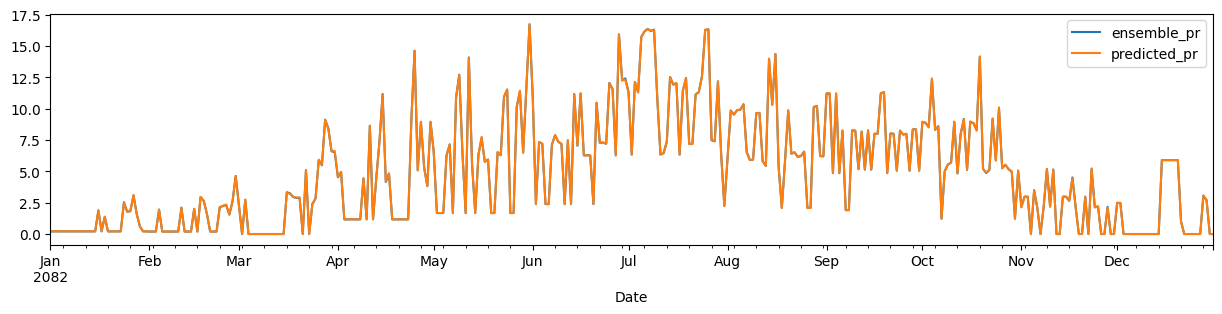

In [ ]:
df_pred2[['ensemble_pr','predicted_pr']].loc[df_pred2.station_id == 0][:365].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.015427507178727606
MSE is 0.0008456990530017802
RMSE is 0.02908090529886888
R2 is 0.9999495611476794


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))

MSE train: 0.001, test: 0.001


> <font color='orangered'> **Temprature**

>> <font color='green'> **Tmax**

In [ ]:
X_train = data_train[['cnrm_tmax',	'miroc_tmax',	'cccma_tmax',	'mpi_tmax']]
y_train = data_train[['ensemble_tmax']]

In [ ]:
X_test = data_test[['cnrm_tmax',	'miroc_tmax',	'cccma_tmax',	'mpi_tmax']]
y_test = data_test[['ensemble_tmax']]

In [ ]:
X_test.describe()

,cnrm_tmax,miroc_tmax,cccma_tmax,mpi_tmax
count,26296.000000,26296.000000,26296.000000,26296.00
mean,27.142470,27.057236,26.826628,inf
std,4.648845,3.830222,3.240212,NaN
min,11.420000,16.190000,18.930000,6.91
25%,23.430000,24.130000,24.190000,25.04
50%,26.390000,26.300000,26.585000,27.67
75%,30.862500,29.720000,29.140000,32.14
max,42.200000,40.110000,41.160000,inf


In [ ]:
#fill those inf with some value
value = X_test['mpi_tmax'].quantile(0.98)
X_test = X_test.replace(np.inf, value)

In [ ]:
#This removes the rows that contain infinity or NaN values
#X_test=X_test[np.isfinite(X_test).all(1)]

In [ ]:
cbmodel = CatBoostRegressor()
cbmodel.fit(X_train, y_train)

Learning rate set to 0.085438
0:	learn: 2.6836334	total: 41.2ms	remaining: 41.1s
1:	learn: 2.4813939	total: 80.6ms	remaining: 40.2s
2:	learn: 2.2994153	total: 113ms	remaining: 37.7s
3:	learn: 2.1317791	total: 171ms	remaining: 42.6s
4:	learn: 1.9750147	total: 227ms	remaining: 45.1s
5:	learn: 1.8332822	total: 274ms	remaining: 45.4s
6:	learn: 1.7028671	total: 314ms	remaining: 44.6s
7:	learn: 1.5825680	total: 362ms	remaining: 44.8s
8:	learn: 1.4722992	total: 413ms	remaining: 45.5s
9:	learn: 1.3674341	total: 479ms	remaining: 47.4s
10:	learn: 1.2727876	total: 530ms	remaining: 47.6s
11:	learn: 1.1844546	total: 550ms	remaining: 45.3s
12:	learn: 1.1059022	total: 587ms	remaining: 44.6s
13:	learn: 1.0308293	total: 625ms	remaining: 44s
14:	learn: 0.9625802	total: 663ms	remaining: 43.5s
15:	learn: 0.9001528	total: 684ms	remaining: 42s
16:	learn: 0.8437814	total: 701ms	remaining: 40.5s
17:	learn: 0.7902737	total: 719ms	remaining: 39.2s
18:	learn: 0.7413428	total: 735ms	remaining: 38s
19:	learn: 0.69

In [ ]:
# view the feature scores
train=data_train[['cnrm_tmax',	'miroc_tmax',	'cccma_tmax',	'mpi_tmax']]
feature_scores = pd.Series(cbmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

mpi_tmax      27.707989
cnrm_tmax     27.485190
miroc_tmax    23.801454
cccma_tmax    21.005368
dtype: float64

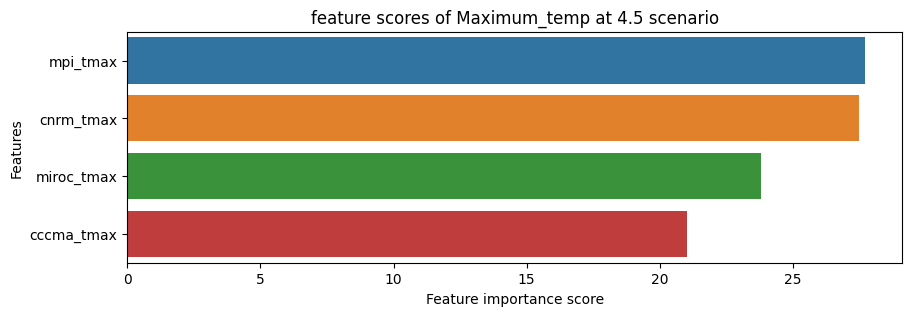

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of Maximum_temp at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = cbmodel.predict(X_train)
Y_test_pred = cbmodel.predict(X_test)

In [ ]:
df_predt3 = pd.DataFrame(y_test, columns=['ensemble_tmax'])
df_predt3['predicted_tmax']= Y_test_pred
df_predt3['Date'] = pd.to_datetime(data_test.Year, format='%Y/%m/%d')
df_predt3['station_id'] = data_test['station_id']
#df_predt3 = df_predt3.reset_index()
df_predt3=df_predt3[['Date','station_id','ensemble_tmax','predicted_tmax']]
# df_predt3 = df_predt3.set_index('Date')
df_predt3.head()

,Date,station_id,ensemble_tmax,predicted_tmax
26298,2082-01-01,0,31.0375,31.095758
26299,2082-01-02,0,30.2500,30.233156
26300,2082-01-03,0,29.7125,29.666900
26301,2082-01-04,0,29.7950,29.803056
26302,2082-01-05,0,29.8250,29.782441


In [ ]:
df_predt3['Date']=pd.to_datetime(df_predt3.Date, format='%Y/%m/%d')
df_predt3['Year']=df_predt3['Date'].dt.year
df_predt3['Month']=df_predt3['Date'].dt.month
df_predt3

,Date,station_id,ensemble_tmax,predicted_tmax,Year,Month
26298,2082-01-01,0,31.0375,31.095758,2082,1
26299,2082-01-02,0,30.2500,30.233156,2082,1
26300,2082-01-03,0,29.7125,29.666900,2082,1
26301,2082-01-04,0,29.7950,29.803056,2082,1
26302,2082-01-05,0,29.8250,29.782441,2082,1
...,...,...,...,...,...,...
131483,2099-12-27,3,29.2275,29.286952,2099,12
131484,2099-12-28,3,30.1525,30.167510,2099,12
131485,2099-12-29,3,29.7475,29.893064,2099,12
131486,2099-12-30,3,27.7775,27.887492,2099,12


<Axes: xlabel='Date'>

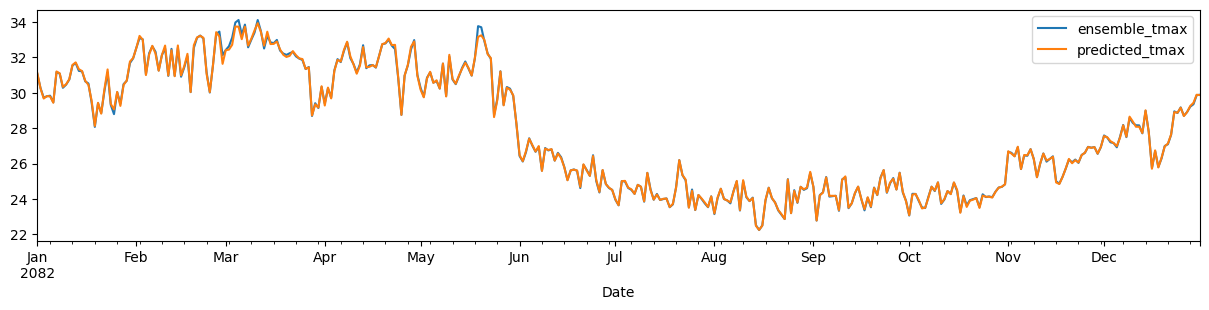

In [ ]:
df_predt3[['ensemble_tmax','predicted_tmax']].loc[df_predt3.station_id == 0][:365].plot(figsize=(15, 3))

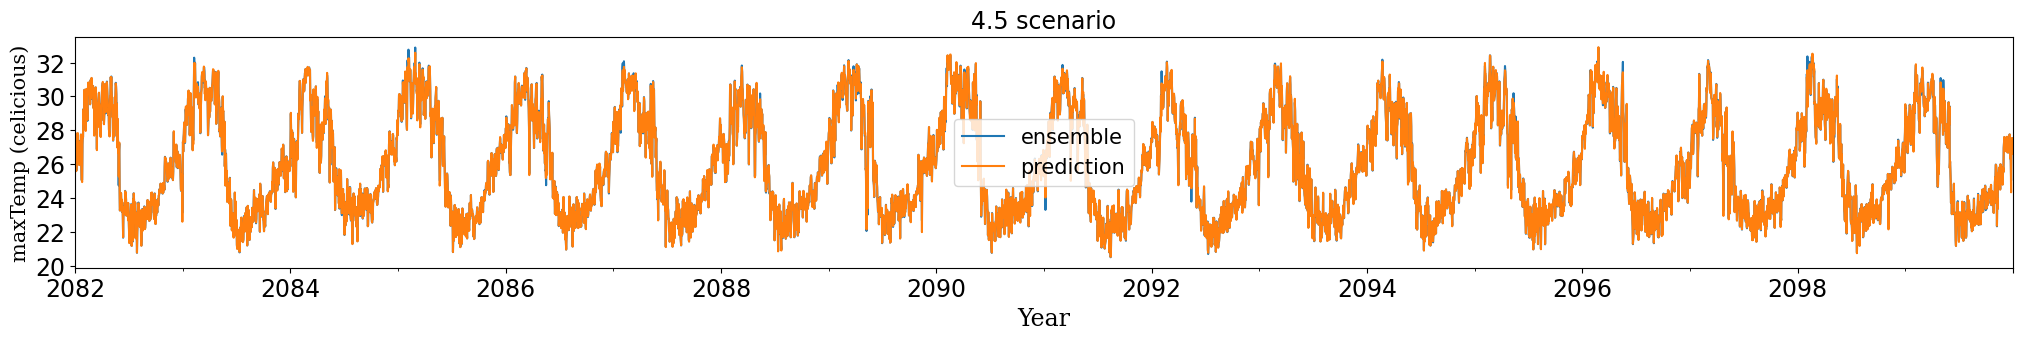

In [ ]:
# Plot
# ==============================================================================
font = {'family':'serif','color':'black','size':17}
font2 = {'family':'serif','color':'black','size':15}

fig, ax = plt.subplots(figsize=(25, 3))
df_predt1['ensemble_tmax'].loc[df_predt1.station_id == 0].plot(ax=ax, label='ensemble')
df_predt1['predicted_tmax'].loc[df_predt1.station_id == 0].plot(ax=ax, label='prediction')
plt.title(fontsize=17,label='4.5 scenario')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
ax.set_xlabel("Year", fontdict = font)
ax.set_ylabel("maxTemp (celicious)",fontdict = font2)
ax.legend(fontsize=15);

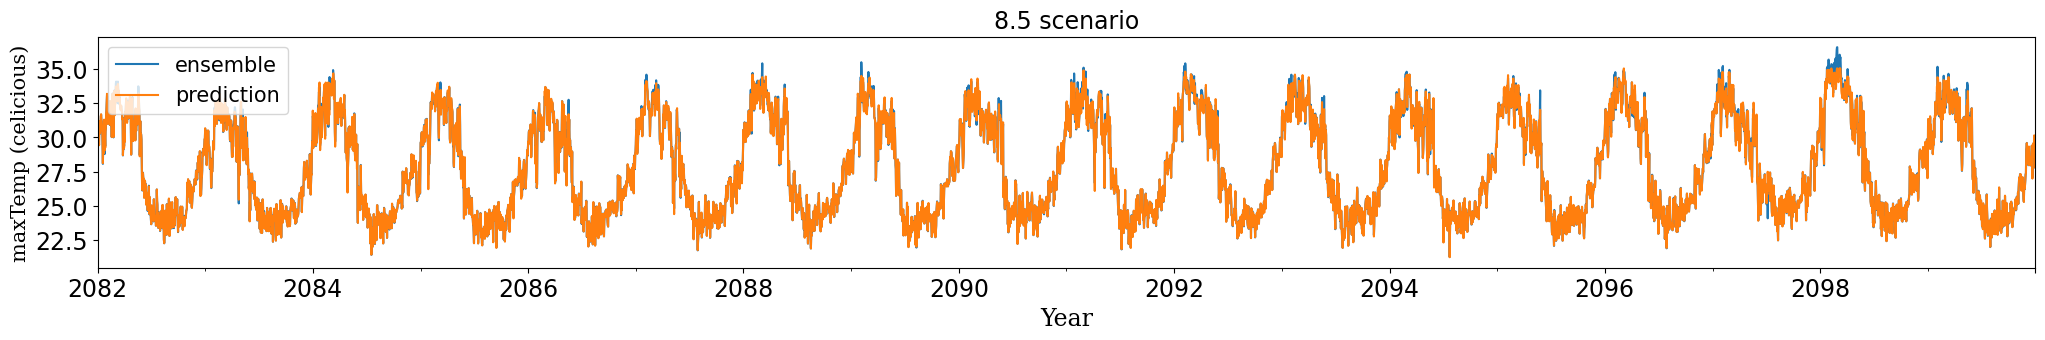

In [ ]:
# Plot
# ==============================================================================
font = {'family':'serif','color':'black','size':17}
font2 = {'family':'serif','color':'black','size':15}

fig, ax = plt.subplots(figsize=(25, 3))
df_predt3['ensemble_tmax'].loc[df_predt3.station_id == 0].plot(ax=ax, label='ensemble')
df_predt3['predicted_tmax'].loc[df_predt3.station_id == 0].plot(ax=ax, label='prediction')
plt.title(fontsize=17,label='8.5 scenario')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
ax.set_xlabel("Year", fontdict = font)
ax.set_ylabel("maxTemp (celicious)",fontdict = font2)
ax.legend(fontsize=15);

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.08106081443245733
MSE is 0.04977742862446831
RMSE is 0.22310855793641873
R2 is 0.9961857068069657


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))

MSE train: 0.005, test: 0.050


>> <font color='green'>**Tmin**

In [ ]:
X_train = data_train[['cnrm_tmin',	'miroc_tmin',	'cccma_tmin',	'mpi_tmin']]
y_train = data_train[['ensemble_tmin']]

In [ ]:
X_test = data_test[['cnrm_tmin',	'miroc_tmin',	'cccma_tmin',	'mpi_tmin']]
y_test = data_test[['ensemble_tmin']]

In [ ]:
#fill those inf with some value
value = X_test['miroc_tmin'].quantile(0.98)
X_test = X_test.replace(np.inf, value)

In [ ]:
cbmodel = CatBoostRegressor()
cbmodel.fit(X_train, y_train)

Learning rate set to 0.085438
0:	learn: 1.5369573	total: 25.7ms	remaining: 25.7s
1:	learn: 1.4211624	total: 42.9ms	remaining: 21.4s
2:	learn: 1.3149761	total: 73.3ms	remaining: 24.4s
3:	learn: 1.2179462	total: 109ms	remaining: 27.2s
4:	learn: 1.1291989	total: 148ms	remaining: 29.4s
5:	learn: 1.0481493	total: 191ms	remaining: 31.7s
6:	learn: 0.9735205	total: 227ms	remaining: 32.2s
7:	learn: 0.9035596	total: 264ms	remaining: 32.8s
8:	learn: 0.8402666	total: 296ms	remaining: 32.6s
9:	learn: 0.7815441	total: 338ms	remaining: 33.5s
10:	learn: 0.7275613	total: 381ms	remaining: 34.3s
11:	learn: 0.6773509	total: 439ms	remaining: 36.1s
12:	learn: 0.6309351	total: 462ms	remaining: 35.1s
13:	learn: 0.5888804	total: 486ms	remaining: 34.2s
14:	learn: 0.5496763	total: 513ms	remaining: 33.7s
15:	learn: 0.5135193	total: 539ms	remaining: 33.2s
16:	learn: 0.4789420	total: 563ms	remaining: 32.6s
17:	learn: 0.4477440	total: 588ms	remaining: 32.1s
18:	learn: 0.4192663	total: 626ms	remaining: 32.3s
19:	lear

In [ ]:
# view the feature scores
train=data_train[['cnrm_tmin',	'miroc_tmin',	'cccma_tmin',	'mpi_tmin']]
feature_scores = pd.Series(cbmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

miroc_tmin    32.420044
cnrm_tmin     24.655183
cccma_tmin    22.858220
mpi_tmin      20.066553
dtype: float64

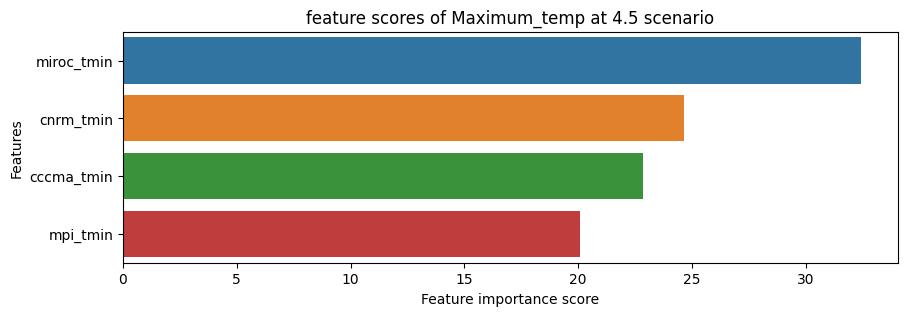

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of Maximum_temp at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = cbmodel.predict(X_train)
Y_test_pred = cbmodel.predict(X_test)

In [ ]:
df_pred4 = pd.DataFrame(y_test, columns=['ensemble_tmin'])
df_pred4['predicted_tmin']= Y_test_pred
df_pred4['Date'] = pd.to_datetime(data_test.Year, format='%Y/%m/%d')
df_pred4['station_id'] = data_test['station_id']
#df_pred4 = df_pred4.reset_index()
df_pred4=df_pred4[['Date','station_id','ensemble_tmin','predicted_tmin']]
# df_pred4 = df_pred4.set_index('Date')
df_pred4.head()

,Date,station_id,ensemble_tmin,predicted_tmin
26298,2082-01-01,0,14.2900,14.305787
26299,2082-01-02,0,13.9750,13.940576
26300,2082-01-03,0,14.2575,14.254507
26301,2082-01-04,0,14.2025,14.175473
26302,2082-01-05,0,14.6850,14.650790


In [ ]:
df_pred4['Date']=pd.to_datetime(df_pred4.Date, format='%Y/%m/%d')
df_pred4['Year']=df_pred4['Date'].dt.year
df_pred4['Month']=df_pred4['Date'].dt.month
df_pred4

,Date,station_id,ensemble_tmin,predicted_tmin,Year,Month
26298,2082-01-01,0,14.2900,14.305787,2082,1
26299,2082-01-02,0,13.9750,13.940576,2082,1
26300,2082-01-03,0,14.2575,14.254507,2082,1
26301,2082-01-04,0,14.2025,14.175473,2082,1
26302,2082-01-05,0,14.6850,14.650790,2082,1
...,...,...,...,...,...,...
131483,2099-12-27,3,13.0650,13.093925,2099,12
131484,2099-12-28,3,12.8425,12.848066,2099,12
131485,2099-12-29,3,12.8700,12.885533,2099,12
131486,2099-12-30,3,11.8300,11.828811,2099,12


<Axes: xlabel='Date'>

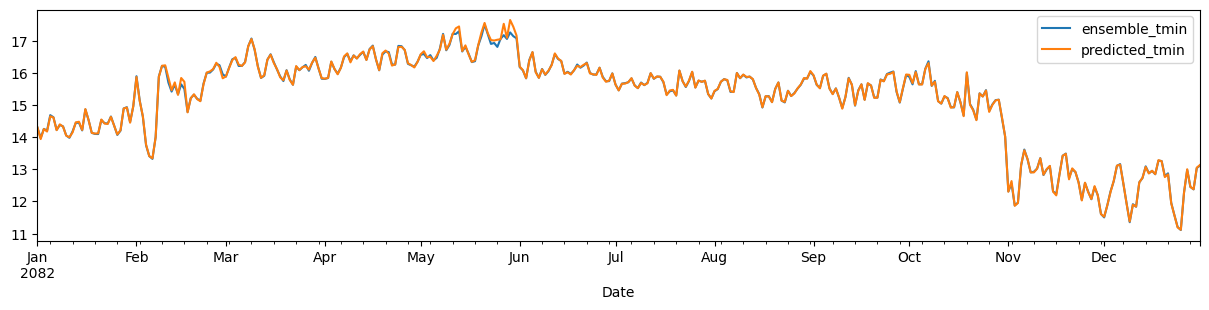

In [ ]:
df_pred4[['ensemble_tmin','predicted_tmin']].loc[df_pred4.station_id == 0][:365].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.024301937465655087
MSE is 0.005845464458982921
RMSE is 0.076455637195585
R2 is 0.9972811233112892


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))
#print(f'Overfitting indicator: {mean_squared_error(y_test, Y_test_pred)} > {mean_squared_error(y_train, Y_train_pred)}')

MSE train: 0.001, test: 0.006
